# **0. ML/DL Workflow Fundamentals**

**Construct My Own WorkFlow Chart???**

1. **Getting Data**

  1.1. Clean data

  1.2.  Split data into training, validation, and test sets

  1.3. Preprocess training, validation, and test sets

2. **Fit Model**

  2.1. Define **Model Architecture** and **Instantiate** It

  2.2. Specify **Loss Function**, and **Determine Optimizer**

  2.3. Construct **Training-Validation Loop**

    ***Training Mode***

    2.3.1. *Forward Propagation Using Training Input*

    2.3.2. *Calculate Loss Between Prediction with Training Target*

    2.3.3. *Nullify Gradients in Optimizer*

    2.3.4. *Backward Propagation*

    2.3.5. *Update Parameters*

    ***Evaluation Mode***

    2.3.6. *Forward Propagation Using Validation Input*

    2.3.7. *Calculate Metrics Between Prediction with Validation Target*

3. Evaluate Model on the Test set

    ***Evaluation Mode***

    3.1. *Forward Propagation Using Test Input*

    3.2. *Calculate Metrics Between Prediction with Test Target*


In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

# **1. Gradient Descent Algorithm**
- Recall the steps in GD algorithm are:
    * **1. Forward Pass (Prediction)**
    * **2. Loss Calculation**
    * **3. Backward Pass (Gradient Computation)**
    * **4. Update Parameters**

- PyTorch has **several essential modules**:
    - [`torch.nn`](https://pytorch.org/docs/stable/nn.html): Seen.
        - L1 Loss: [`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html); L2 Loss: [`torch.nn.MSELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)
    - [`torch.optim`](https://pytorch.org/docs/stable/optim.html): Contains optimization algorithms how the model parameters update.

        - **SGD**: [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD); **Adam**: [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam).
- Now let us do the gradient computation of step 3 using the built-in `.backward` function in PyTorch.

 - While doing so, the **gradients of all the parameters** are accumulated by default.

 - This gradient accumulation can lead to wrong gradient updates.

- As a result, another phase to set **all gradients of the parameters to zero** ($\Delta \mathbf{w}\leftarrow \mathbf{0}$) is required prior to computing new gradients.

- Hence, the GD algorithm becomes:
  * **1. Forward Pass (Prediction)**
  * **2. Loss Calculation**
  * **3. Backward Pass (Gradient Computation)**
  * **4. Update Parameters**
  * **5. Zeroing Gradients**

In [ ]:
# 1. Forward pass / prediction
def forward(x):
  return w * x

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, requires_grad=True)
criterion = nn.MSELoss()
print(criterion)

lr = 0.01
optimizer = torch.optim.SGD([w], lr=lr)  # 4. Parameter(s) should be given as a list.
print(optimizer)

epochs = 20
for epoch in range(1, epochs + 1):
  y_pred = forward(x)             # 1. Forward pass / prediction
  loss = criterion(y_pred, y)     # 2. Loss calculation / MSE
  loss.backward()                 # 3. Gradient computation
  optimizer.step()                # 4. Update Parameters / Optimizer
  optimizer.zero_grad()           # 5. Zeroing gradients (a must)

  print(f'Epoch {epoch}: w = {w:.3f}, loss = {loss:.5f}')

MSELoss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Epoch 1: w = 0.300, loss = 30.00000
Epoch 2: w = 0.555, loss = 21.67500
Epoch 3: w = 0.772, loss = 15.66019
Epoch 4: w = 0.956, loss = 11.31449
Epoch 5: w = 1.113, loss = 8.17472
Epoch 6: w = 1.246, loss = 5.90623
Epoch 7: w = 1.359, loss = 4.26725
Epoch 8: w = 1.455, loss = 3.08309
Epoch 9: w = 1.537, loss = 2.22753
Epoch 10: w = 1.606, loss = 1.60939
Epoch 11: w = 1.665, loss = 1.16279
Epoch 12: w = 1.716, loss = 0.84011
Epoch 13: w = 1.758, loss = 0.60698
Epoch 14: w = 1.794, loss = 0.43854
Epoch 15: w = 1.825, loss = 0.31685
Epoch 16: w = 1.851, loss = 0.22892
Epoch 17: w = 1.874, loss = 0.16540
Epoch 18: w = 1.893, loss = 0.11950
Epoch 19: w = 1.909, loss = 0.08634
Epoch 20: w = 1.922, loss = 0.06238


- **Note:** On the ordering of steps, there could be slightly different ways, such as the one showing below might be common.
- Keep in mind that always
    - the **loss function** (`loss = ...`) should be ***before*** the backpropagation (`loss.backward()`),
    - **parameters update** (`optimizer.step()`)  should be ***after*** backpropagation, and
    - **zero gradients** (`optimizer.zero_grad()`) should be ***before***  **parameters update** (`optimizer.step()`).

- Accordingly, the steps GD algorithm can be ordered as:
    * **1. Forward Pass (Prediction)**
    * **2. Loss Calculation**
    * **3. Zeroing Gradients**
    * **4. Backward Pass (Gradient Computation)**
    * **5. Update Parameters**


# **2. Linear Regression Using PyTorch**


- We will use linear regression to create the data with known **parameters** (things that can be learned by a model).
- Then, we will use PyTorch to see if we can build model to estimate these parameters using [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

## **2.1. Instantiating a Linear Regression Model**

- A linear regression $ y=w_0+w_1x_1+\cdots+w_kx_k $ is a single linear layer NN.
- An instance of a linear regression model can be created using the built-in PyTorch (**linear layer**) function:  
      `torch.nn.Linear(in_features, out_features, bias = True)`
    - `in_features` is for the number of input features,
    - `out_features` is for the number of features,
    - `bias = True` is for including the bias in the model by default.
- Implementation of the linear layer of `nn.Linear()` internally calls the following equation:

$$\mathbf{y} = \mathbf{x}\mathbf{W}^T  + \mathbf{b}.$$


- Now let us consider a **Simple Linear Regression**
    - 1 input
    - 1 output

In [ ]:
simple_linear = nn.Linear(in_features = 1, out_features = 1)
simple_linear

Linear(in_features=1, out_features=1, bias=True)

- We can get the state or contents (what the model contains) of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).
- But when the model has several parameters, looking the state dictionary may not be as simple as possible.

In [ ]:
simple_linear.state_dict()

OrderedDict([('weight', tensor([[-0.6831]])), ('bias', tensor([-0.8484]))])

- Notice how the values for `weight` and `bias` from `model.state_dict()` come out as random float tensors
- This is because they are initialized internally using `torch.randn()`.
- The `parameters` method in PyTorch modules also returns an iterator over the trainable parameters of the model.

In [ ]:
simple_linear.parameters()

<generator object Module.parameters at 0x7dfa4eddf7d0>

- A generator object in Python is a special type of iterator created by a generator function or a generator expression.
- Generators allow us to iterate over a sequence of values lazily, meaning they generate values on-the-fly and do not store them in memory.
- This can be more memory-efficient than using lists, especially for large datasets or infinite sequences.
- To work with the generator object and access the parameters, it can be converted to a **list** or a **loop** can be used.

In [ ]:
list(simple_linear.parameters())

[Parameter containing:
 tensor([[-0.6831]], requires_grad=True),
 Parameter containing:
 tensor([-0.8484], requires_grad=True)]

In [ ]:
for i in simple_linear.parameters():
  print(i)

Parameter containing:
tensor([[-0.6831]], requires_grad=True)
Parameter containing:
tensor([-0.8484], requires_grad=True)


In [ ]:
w, w0 = simple_linear.parameters()
print(w0)
print(w)

Parameter containing:
tensor([-0.8484], requires_grad=True)
Parameter containing:
tensor([[-0.6831]], requires_grad=True)


- A helpful way to get information from the model is to use [`torchinfo`](https://github.com/TylerYep/torchinfo).
- It comes with a `summary()` method that takes a PyTorch model as well as an `input_size`.

In [ ]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

In [ ]:
torchinfo.summary(simple_linear, input_size=[1])

Layer (type:depth-idx)                   Output Shape              Param #
Linear                                   [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

- The output of `torchinfo.summary()` gives us a whole bunch of information about the model such as:
    - `Total params`, the total number of parameters in the model,
    - the `Estimated Total Size (MB)` which is the size of the model.

- Consider now **Multiple Linear Regression**
    - 2 or more inputs
    - 1 output

In [ ]:
multiple_linear = nn.Linear(in_features = 3, out_features = 1) # multiple LR
multiple_linear

Linear(in_features=3, out_features=1, bias=True)

In [ ]:
torchinfo.summary(multiple_linear, input_size=[3])

Layer (type:depth-idx)                   Output Shape              Param #
Linear                                   [1]                       4
Total params: 4
Trainable params: 4
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## **2.2. Prediction Using Instantiated Model**

- With the given randomly initialized parameters, an output can be predicted for a given input.

In [ ]:
X = torch.tensor([1], dtype=torch.float32)
print(x.shape)
simple_linear(X)

torch.Size([4])


tensor([-1.5315], grad_fn=<ViewBackward0>)

In [ ]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
print(x.shape)
# simple_linear(X)   # produces error of shape mismatch

torch.Size([4])


- Note that PyTorch models require both the inputs and outputs to be **2D** (**column vector tensors**).
  - Inputs data
      - **rows** - number of examples (e.g, n=4).
      - **columns** - number of input features (e.g, simple LR - k=1, MLR - k1).
  - Outputs data
      - **rows** - number of examples (e.g, n=4).
      - **columns** - number of output features (e.g, univariate - p=1, multivariate - p1)
- In the above example, the variable `x` has values in the form of list tensor.
    - We can convert to 2D manually as follows and let us observe its shape.

In [ ]:
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
print(x, x.shape)

tensor([[1.],
        [2.],
        [3.],
        [4.]]) torch.Size([4, 1])


- Converting manually is not feasible way when having larger number of examples.
- Instead, the `.unsqueeze` function can be used.

In [ ]:
x1 = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
print("x1 =", x1, x1.shape)
x2 = x1.unsqueeze(dim = 0)
print("x2 =", x2, x2.shape)

x1 = tensor([1., 2., 3., 4.]) torch.Size([4])
x2 = tensor([[1., 2., 3., 4.]]) torch.Size([1, 4])


- The appropriate format is:

In [ ]:
x = x1.unsqueeze(dim = 1)
print(x, x.shape)

tensor([[1.],
        [2.],
        [3.],
        [4.]]) torch.Size([4, 1])


In [ ]:
num_examples, num_inputs = x.shape
print(f"Examples: {num_examples}, Inputs: {num_inputs}")

Examples: 4, Inputs: 1


- The same format is used for the output feature data during the training.

- Now let us again consider the multiple linear model

In [ ]:
x = torch.tensor([5.0, 4.0, 2.0])
print(x.shape)
y_pred = multiple_linear(x)
y_pred

torch.Size([3])


tensor([-2.7337], grad_fn=<ViewBackward0>)

In [ ]:
x = torch.tensor([[5.0, 4.0, 2.0], [10.0, 8.0, 4.0]])
print(x.shape)
y_pred = multiple_linear(x)
y_pred

torch.Size([2, 3])


tensor([[-2.7337],
        [-5.5765]], grad_fn=<AddmmBackward0>)

In [ ]:
x = torch.tensor([[5.0, 4.0, 2.0], [10.0, 8.0, 4.0], [15.0, 12.0, 6.0]])
print(x.shape)
y_pred = multiple_linear(x)
y_pred

torch.Size([3, 3])


tensor([[-2.7337],
        [-5.5765],
        [-8.4192]], grad_fn=<AddmmBackward0>)

- **Turning off the gradient computation**
    - Useful to perform forward passes during model evaluation or deployment.
    - Offers performance benefits by reducing overhead during inference.
    - Gradient tracking is necessary for training but **not for inference**.
  
- Let us turn off the gradient computation using `.detach()` and context managers.

In [ ]:
%%time
y_pred = multiple_linear(x).detach()
y_pred

CPU times: user 296 µs, sys: 0 ns, total: 296 µs
Wall time: 304 µs


tensor([[-2.7337],
        [-5.5765],
        [-8.4192]])

In [ ]:
%%time
with torch.no_grad():
  y_pred = multiple_linear(x)

y_pred

CPU times: user 242 µs, sys: 21 µs, total: 263 µs
Wall time: 271 µs


tensor([[-2.7337],
        [-5.5765],
        [-8.4192]])

In [ ]:
%%time
with torch.inference_mode():
  y_pred = multiple_linear(x)

y_pred

CPU times: user 838 µs, sys: 0 ns, total: 838 µs
Wall time: 52.7 ms


tensor([[-2.7337],
        [-5.5765],
        [-8.4192]])

- **Note:**
  - While `.detach()`, [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) and `torch.no_grad()` do similar things, `torch.inference_mode()` is newer, potentially faster and preferred (See [PyTorch post on X](https://twitter.com/PyTorch/status/1437838231505096708?s=20)).
  - `torch.inference_mode()` disables not only gradient computation but also other autograd features, which can save memory and improve speed.

## **2.4. Training Linear Regression**


In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32).unsqueeze(dim = 1)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32).unsqueeze(dim = 1)
print("Input shape", x.shape, "Output shape", y.shape)

Input shape torch.Size([4, 1]) Output shape torch.Size([4, 1])


In [ ]:
num_examples, num_inputs = x.shape
num_examples, num_outputs = x.shape

In [ ]:
simple_regression = nn.Linear(num_inputs, num_outputs)
print("Model:", simple_regression)
print("---------------")
criterion = nn.MSELoss()
print("Loss:", criterion)
print("---------------")
lr = 0.01
optimizer = torch.optim.SGD(simple_regression.parameters(), lr=lr)
print("Optimizer:", optimizer)

Model: Linear(in_features=1, out_features=1, bias=True)
---------------
Loss: MSELoss()
---------------
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
epochs = 30
for epoch in range(1, epochs + 1):
  y_pred = simple_regression(x)
  loss = criterion(y, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  print(f'Epoch {epoch}:, loss = {loss:.5f}')

print(f"Final w = {list(simple_regression.parameters())}")

Epoch 1:, loss = 39.01712
Epoch 2:, loss = 27.10949
Epoch 3:, loss = 18.84681
Epoch 4:, loss = 13.11330
Epoch 5:, loss = 9.13473
Epoch 6:, loss = 6.37386
Epoch 7:, loss = 4.45795
Epoch 8:, loss = 3.12832
Epoch 9:, loss = 2.20551
Epoch 10:, loss = 1.56499
Epoch 11:, loss = 1.12034
Epoch 12:, loss = 0.81159
Epoch 13:, loss = 0.59716
Epoch 14:, loss = 0.44817
Epoch 15:, loss = 0.34458
Epoch 16:, loss = 0.27250
Epoch 17:, loss = 0.22229
Epoch 18:, loss = 0.18725
Epoch 19:, loss = 0.16274
Epoch 20:, loss = 0.14553
Epoch 21:, loss = 0.13340
Epoch 22:, loss = 0.12479
Epoch 23:, loss = 0.11862
Epoch 24:, loss = 0.11415
Epoch 25:, loss = 0.11086
Epoch 26:, loss = 0.10838
Epoch 27:, loss = 0.10648
Epoch 28:, loss = 0.10497
Epoch 29:, loss = 0.10374
Epoch 30:, loss = 0.10270
Final w = [Parameter containing:
tensor([[1.7268]], requires_grad=True), Parameter containing:
tensor([0.7752], requires_grad=True)]


- **Note**:
    - The bias is not yet close to 0 and the same is true for the slope, which is not close to 2.
    - So there is a need to play around the **the learning rate and/or number of epochs** (hyperparameters).
    - Finally, the algorithm will figureout the ideal values, 0 and 2 of the bias and slope, respectively.
- Set the number of epochs to 100 and observe the difference.

## **2.5. Defining Model Subclassing `nn.Module`**

- PyTorch has **several essential modules**:
    - [`torch.nn`](https://pytorch.org/docs/stable/nn.html): Seen.
    - [`torch.optim`](https://pytorch.org/docs/stable/optim.html): Seen
    - [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) is the **base class** for all neural network modules in PyTorch.
        - Building an NN should subclass `nn.Module` with a must `forward()` method .


- A model in DL frameworks like PyTorch or TensorFlow is defined by specifying the layers, connections, and parameters.
- This is done by creating a class that inherits from a base model class, such as `nn.Module` in PyTorch.
  - Almost all PyTorch models are subclasses of `nn.Module`.
  - And they require a **`forward()`** method to be defined as a must.


In [ ]:
class RegressionModelV0(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.linear_layer = nn.Linear(input_dim, output_dim)               # one layer

  def forward(self, x):                                                # forward pass
    return self.linear_layer(x)

- Once the model class is defined, instantiating the model means creating an object of that class.
- Let us now create the model instace.

In [ ]:
reg_model_0 = RegressionModelV0(input_dim=1, output_dim=1)
reg_model_0

RegressionModelV0(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

- The model name can be returned as follows, but only if the model is created in a class

In [ ]:
reg_model_0.__class__.__name__

'RegressionModelV0'

- Passing input data in to the model goes through the model's `forward()` method and produces predicted result.

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32).unsqueeze(dim = 1)
reg_model_0.forward(x)

tensor([[-1.3108],
        [-2.1907],
        [-3.0706],
        [-3.9506]], grad_fn=<AddmmBackward0>)

In [ ]:
reg_model_0(x)

tensor([[-1.3108],
        [-2.1907],
        [-3.0706],
        [-3.9506]], grad_fn=<AddmmBackward0>)

- Let us train the model by clicking the following cells and observe the reduction in the loss and changes in the values of the parameters


In [ ]:
reg_model_0 = RegressionModelV0(input_dim=1, output_dim=1)
criterion = nn.MSELoss()
lr = 0.01
optimizer = torch.optim.SGD(reg_model_0.parameters(), lr=lr)

In [ ]:
y_pred = reg_model_0(x)
loss = criterion(y, y_pred)
optimizer.zero_grad()
loss.backward()
optimizer.step()

print(f'Epoch {epoch}: loss = {loss.detach():.5f}', loss)
print(f"Weights = {list(reg_model_0.parameters())}")

Epoch 30: loss = 50.61208 tensor(50.6121, grad_fn=<MseLossBackward0>)
Weights = [Parameter containing:
tensor([[-0.2090]], requires_grad=True), Parameter containing:
tensor([0.1326], requires_grad=True)]


- The completion of the training steps (one complete forward and backward propagation) represent one epoch of training.

In [ ]:
y_pred = reg_model_0(x)
loss = criterion(y, y_pred)
optimizer.zero_grad()
loss.backward()
optimizer.step()

print(f'Epoch {epoch}: loss = {loss.detach():.5f}', loss)
print(f"Weights = {list(reg_model_0.parameters())}")

Epoch 30: loss = 35.15032 tensor(35.1503, grad_fn=<MseLossBackward0>)
Weights = [Parameter containing:
tensor([[0.1157]], requires_grad=True), Parameter containing:
tensor([0.2404], requires_grad=True)]


In [ ]:
y_pred = reg_model_0(x)
loss = criterion(y, y_pred)
optimizer.zero_grad()
loss.backward()
optimizer.step()

print(f'Epoch {epoch}: loss = {loss.detach():.5f}', loss)
print(f"Weights = {list(reg_model_0.parameters())}")

Epoch 30: loss = 24.42153 tensor(24.4215, grad_fn=<MseLossBackward0>)
Weights = [Parameter containing:
tensor([[0.3863]], requires_grad=True), Parameter containing:
tensor([0.3299], requires_grad=True)]


- Insteady of re-running every time, the training code can be executed using a for loop.

In [ ]:
reg_model_0 = RegressionModelV0(input_dim=1, output_dim=1)

criterion = nn.MSELoss()
lr = 0.01
optimizer = torch.optim.SGD(reg_model_0.parameters(), lr=lr)

epochs = 30

for epoch in range(1, epochs + 1):
  y_pred = reg_model_0(x)
  loss = criterion(y, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print(f'Epoch {epoch}: loss = {loss:.5f}')

print(f"Final w = {list(reg_model_0.parameters())}")

Epoch 1: loss = 43.02824
Epoch 2: loss = 29.87829
Epoch 3: loss = 20.75368
Epoch 4: loss = 14.42219
Epoch 5: loss = 10.02876
Epoch 6: loss = 6.98013
Epoch 7: loss = 4.86462
Epoch 8: loss = 3.39659
Epoch 9: loss = 2.37783
Epoch 10: loss = 1.67080
Epoch 11: loss = 1.18009
Epoch 12: loss = 0.83947
Epoch 13: loss = 0.60299
Epoch 14: loss = 0.43879
Epoch 15: loss = 0.32473
Epoch 16: loss = 0.24546
Epoch 17: loss = 0.19034
Epoch 18: loss = 0.15197
Epoch 19: loss = 0.12523
Epoch 20: loss = 0.10656
Epoch 21: loss = 0.09348
Epoch 22: loss = 0.08430
Epoch 23: loss = 0.07780
Epoch 24: loss = 0.07318
Epoch 25: loss = 0.06986
Epoch 26: loss = 0.06744
Epoch 27: loss = 0.06565
Epoch 28: loss = 0.06430
Epoch 29: loss = 0.06324
Epoch 30: loss = 0.06240
Final w = [Parameter containing:
tensor([[1.7856]], requires_grad=True), Parameter containing:
tensor([0.6011], requires_grad=True)]


- **Note**: Every time to re-train a model, **instantiating the model** together with the optimizer is required.

# **3. More on Single Layer Neural Networks**

## **3.1. Spliting Data into Train and Test Sets**

- One of most important steps in an ML project is creating **training**, **validation** (optional) and **testing** sets.
    - **Training set**: The model learns from the training data (like learning course materials in a semester), 60-80%.
    - **Validation set**: The model gets tuned on validation data (like taking practice exam before final exam), 10-20%.
    - **Testing set**: The model gets evaluated on test data to test what it has learned (like taking final exam), 10-20%.



- Now, let us generate 1000 values and split to training and testing sets.

In [ ]:
weight = 0.7
bias = 0.3

torch.manual_seed(42)
X = torch.rand(50)
X[:10], X.shape

(tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408,
         0.1332]),
 torch.Size([50]))

In [ ]:
y = weight * X + bias + torch.randn(len(X)) * 0.01
y[:10]

tensor([0.9184, 0.9458, 0.5631, 0.9834, 0.5652, 0.7133, 0.4712, 0.8463, 0.9579,
        0.4000])

In [ ]:
len(X), len(y)

(50, 50)

- Let us split `X` and `y` into train and test sets.
- 80% training set, 20% testing set

In [ ]:
train_prob = 0.80
train_obs = np.random.choice([0, 1], p=[1-train_prob, train_prob], size=len(X))
X_train, y_train, X_test, y_test = X[train_obs==1], y[train_obs==1], X[train_obs==0], y[train_obs==0]
len(X_train), len(y_train), len(X_test), len(y_test)

(37, 37, 13, 13)

- Convert to **two dimensional array of tensors**.

In [ ]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([37, 1]),
 torch.Size([13, 1]),
 torch.Size([37, 1]),
 torch.Size([13, 1]))

- We have 80% examples for training (`X_train` & `y_train`) and 20% examples for testing (`X_test` & `y_test`).

- **Visualization**: Let's create a function to visualize and compare the training  and testing data.

In [ ]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):

  plt.figure(figsize=(10, 6))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training")
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size": 10})

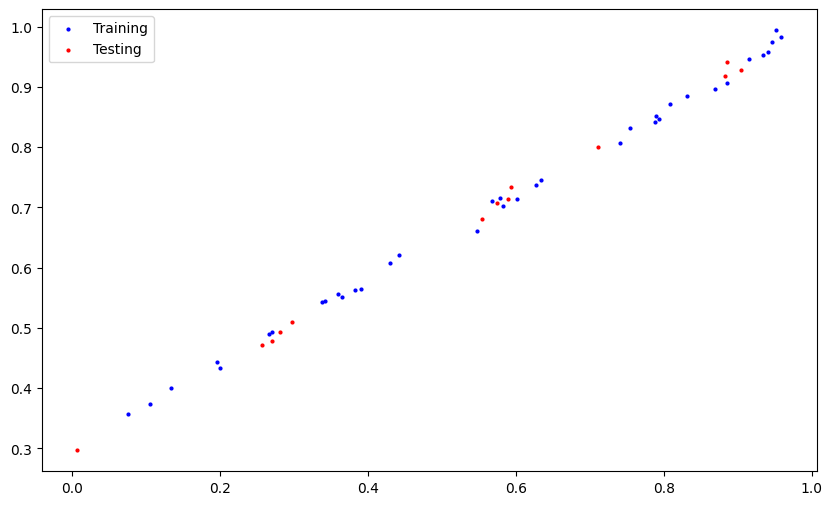

In [ ]:
plot_predictions(train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test);


- Now instead of just being numbers on a page, the data is a straight line.
- Let us go building a model that can learn the relationship between `X` (**features**) and `y` (**labels**).


## **3.2. Define Model Architecture**




**Option 1: Using `torch.nn.Linear()`**

- The function [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html), where `in_features` is the **number of dimensions of the input data** and `out_features` is the **number of dimensions of the output**, is used usually.
- `nn.Linear()`  is also called **linear transform**, **fully connected layer**, **dense layer** (in tensor flow).


In [ ]:
class RegressionModelV1(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = num_inputs, out_features = num_outputs)

  def forward(self, x: torch.Tensor):
    return self.linear_layer(x)

## **3.3. Instantiating Model and Making Random Predictions**

- Let's create a model instance with a randomly initialized parameters with the class we've made.
- We can use a seed for the purpose of reproducibility if needed.

In [ ]:
torch.manual_seed(42)
model_v1 = RegressionModelV1(num_inputs=1, num_outputs=1)
print(model_v1)

RegressionModelV1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


- Contents of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).



In [ ]:
model_v1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

Let us check its parameters using [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).

In [ ]:
list(model_v1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [ ]:
model_v1.forward(torch.tensor([0.4]))

tensor([1.1358], grad_fn=<ViewBackward0>)

In [ ]:
model_v1(torch.tensor([0.4]))

tensor([1.1358], grad_fn=<ViewBackward0>)

In [ ]:
model_v1.forward(torch.tensor([0.2, 0.4]).unsqueeze(dim = 1))

tensor([[0.9829],
        [1.1358]], grad_fn=<AddmmBackward0>)

- To make prediction on the entire test data, we can pass it the test data `X_test` to see how closely it predicts `y_test`.
- But, because the initial model starts with random values, right now it'll have **poor predictive power**.

In [ ]:
model_v1.forward(X_test)

tensor([[1.5045],
        [1.0262],
        [1.2838],
        [1.5070],
        [1.2688],
        [1.0362],
        [1.0570],
        [0.8347],
        [1.5211],
        [1.2541],
        [1.3732],
        [1.0452],
        [1.2807]], grad_fn=<AddmmBackward0>)

In [ ]:
with torch.inference_mode():
    y_preds = model_v1(X_test)

y_preds

tensor([[1.5045],
        [1.0262],
        [1.2838],
        [1.5070],
        [1.2688],
        [1.0362],
        [1.0570],
        [0.8347],
        [1.5211],
        [1.2541],
        [1.3732],
        [1.0452],
        [1.2807]])

- Let's visualize the predictions with the `plot_predictions()` function.

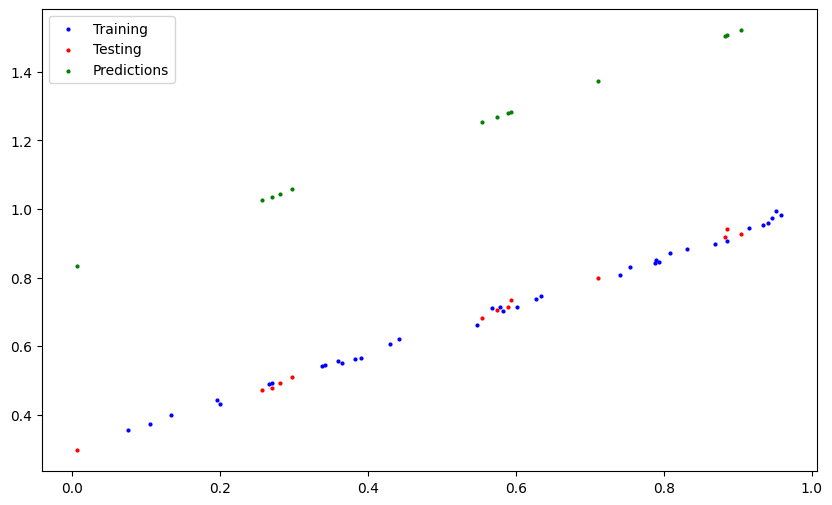

In [ ]:
plot_predictions(train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test,
                predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[-0.5862],
        [-0.5549],
        [-0.5499],
        [-0.5650],
        [-0.5618],
        [-0.5580],
        [-0.5477],
        [-0.5379],
        [-0.5929],
        [-0.5726],
        [-0.5732],
        [-0.5512],
        [-0.5668]])

- Those predictions look pretty bad because the model is just using random parameter values.
- Time to change that.

**Option 2: Using `torch.nn.Parameter()`**

- Instead of using `nn.Linear()`, `nn.Parameter()` is used to define the **weight and bias parameters manually**.
- Both $w$ and $b$ will be **defined with initialized given or random values**.

In [ ]:
class RegressionModelV2(nn.Module):
  def __init__(self):
      super().__init__()
      self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
      self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor):
      return self.weight * x + self.bias


In [ ]:
torch.manual_seed(42)
model_v2 = RegressionModelV2()
print(model_v2)
print(list(model_v2.parameters()))

RegressionModelV2()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
model_v2.weight, model_v2.bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True))

In [ ]:
model_v2.forward(torch.tensor(0.4))

tensor([0.2635], grad_fn=<AddBackward0>)

In [ ]:
model_v2(torch.tensor(0.4))

tensor([0.2635], grad_fn=<AddBackward0>)

- In defining the model using the first option, the input requires `.unsqueeze(dim = 0)`.

- Until now, the model is making predictions using random parameters, it is basically guessing (randomly).
- To fix that, we can update its internal parameters (also refer to **parameters** as **patterns**), the `weight` and `bias` values.
- The values will then be get adjusted as the model learns using an optimization algorithm, say, gradient descent.

## **3.4. Loss Function and Optimizer**



In [ ]:
# New instantiation
torch.manual_seed(42)
model_1 = RegressionModelV1(num_inputs=1, num_outputs=1)
list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

- After instantiating a model, a **loss function** (`loss=`) to be minimized and an **optimizer** to which the model's parameters (`.parameters()`) need to be passed to adjust them during training are needed to be specified.

In [ ]:
criterion = nn.L1Loss()                                                 # MAE loss
optimizer = torch.optim.SGD(params = model_1.parameters(),  lr = 0.01)  # Create the optimizer
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## **3.5. Train and Validate Model**


In [ ]:
torch.manual_seed(42)
model_1 = RegressionModelV1(num_inputs=1, num_outputs=1)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),  lr = 0.01)

epochs = 100

train_loss_values = []
epoch_count = []

for epoch in range(1, epochs + 1):
  y_pred = model_1(X_train)
  loss = criterion(y_pred, X_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  epoch_count.append(epoch)
  train_loss_values.append(loss.detach().numpy())
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | MAE Loss: {loss:.5f}")

Epoch: 10 | MAE Loss: 0.57426
Epoch: 20 | MAE Loss: 0.44099
Epoch: 30 | MAE Loss: 0.30773
Epoch: 40 | MAE Loss: 0.17455
Epoch: 50 | MAE Loss: 0.13207
Epoch: 60 | MAE Loss: 0.12417
Epoch: 70 | MAE Loss: 0.11912
Epoch: 80 | MAE Loss: 0.11408
Epoch: 90 | MAE Loss: 0.10903
Epoch: 100 | MAE Loss: 0.10399


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5731]])),
             ('linear_layer.bias', tensor([0.2738]))])

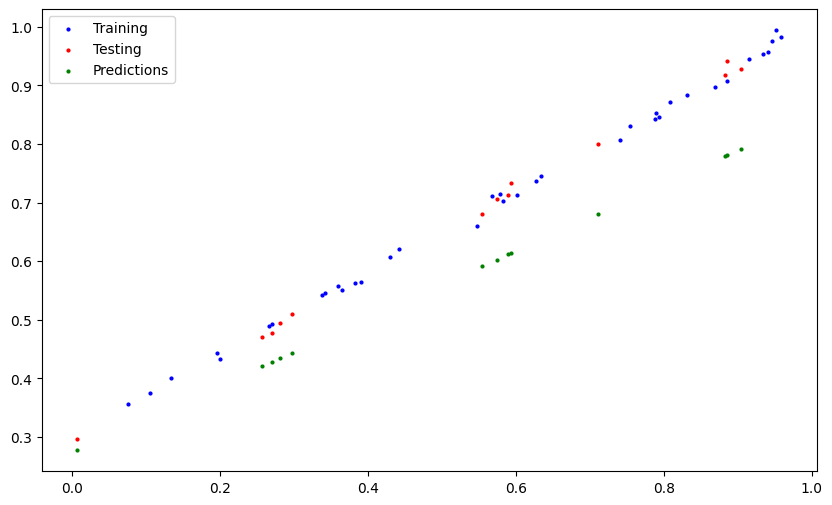

In [ ]:
with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test,
                predictions=y_preds)

- After training a model, its performance should be evaluated on a separate validation or test set.
- As for the testing loop (evaluating model), the typical steps include
    - **forward pass**,
    - **loss calculation**,
    - and **evaluation metrics** (optional).

- Notice in the validation/testing loop:
    - No **backpropagation** (`loss.backward()`),
    - and no **parameters update** (`optimizer.step()`).

- In testing, the only concern is the output of the forward pass through the model.
- In this case, the model should be set in evaluation mode using `model.eval()` **before making predictions or computing performance metrics**.
- This mode disables any training-specific modifications like **dropout** or **batch normalization** in the layers and makes the model operates in the same way as it did during training.


- Let us put all of the above together and train the model for 100 **epochs** (forward passes through the data).


In [ ]:
torch.manual_seed(42)
model_1 = RegressionModelV1(num_inputs=1, num_outputs=1)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),  lr = 0.01)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(1, epochs + 1):

  model_1.train()
  y_pred = model_1(X_train)
  loss = criterion(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test).squeeze(dim = 1)
    test_loss = criterion(test_pred, y_test.type(torch.float))

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss:.5f} | MAE Test Loss: {test_loss:.5f} ")

Epoch: 10 | MAE Train Loss: 0.44620 | MAE Test Loss: 0.44161 
Epoch: 20 | MAE Train Loss: 0.31293 | MAE Test Loss: 0.33568 
Epoch: 30 | MAE Train Loss: 0.17967 | MAE Test Loss: 0.24819 
Epoch: 40 | MAE Train Loss: 0.05503 | MAE Test Loss: 0.20394 
Epoch: 50 | MAE Train Loss: 0.03893 | MAE Test Loss: 0.20080 
Epoch: 60 | MAE Train Loss: 0.03479 | MAE Test Loss: 0.20237 
Epoch: 70 | MAE Train Loss: 0.03094 | MAE Test Loss: 0.20392 
Epoch: 80 | MAE Train Loss: 0.02721 | MAE Test Loss: 0.20555 
Epoch: 90 | MAE Train Loss: 0.02348 | MAE Test Loss: 0.20717 
Epoch: 100 | MAE Train Loss: 0.01975 | MAE Test Loss: 0.20879 


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([13, 1])) that is different to the input size (torch.Size([13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


- The loss is going down with every epoch.
- Let us plot the loss curve.
- A [**loss curve**](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic) is a graphical representation of the loss values on training and test over the course of training.
    - Assess the **model's performance**.
    - Detect issues like **overfitting** or **underfitting**.
    - Guide decisions on **when to stop training**.
    - Adjust **hyperparameters**.

- An overfitting model is one that **performs better on the training set** but not on the **validation/test** set (the test/validation loss is higher than the training loss).
- If the training loss is far lower than the test loss, the model is **overfitting**.
- Learning the patterns in the training too well is not generalizing to the test data.
- The other side is when the training and test loss are not as low as required, this is considered **underfitting**.

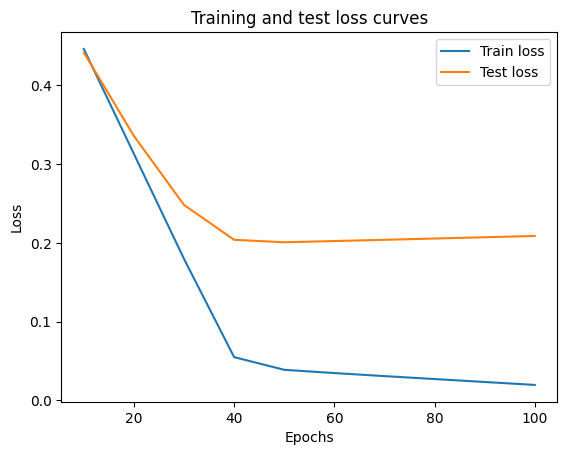

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

- The **loss curves** show the loss going down over time.
- Let us inspect our model's [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html) to see see how close our model gets to the original values we set.



In [ ]:
print("The model learned the following values for weights and bias:")
print(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6231]])), ('linear_layer.bias', tensor([0.3508]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


- The model would probably get even closer if we train it for longer.

 **Exercise:** Try changing the number of `epochs` 200, what happens to the loss curves and the weights and bias parameter values ?

## **3.7. Making Predictions**

- Already seen a glimpse of predictions/inference in the training and testing code above.
- The steps to do outside of the training/testing loop are similar.

- There are three things to remember when making predictions (also called inference) with a PyTorch model:

   1. Set the **model in evaluation mode** (`model.eval()`).
   2. Make the **predictions using the inference mode** context manager (with `torch.inference_mode(): ...`).
   3. All predictions should be made with **objects on the same device** (e.g. both data and model on GPU or both data and model on CPU).

- The first two items **turn-off all setting and computations not necessary for inference** for the purpose of faster computation.
- And the third ensures not to run into **cross-device errors**.

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.9005],
        [0.5107],
        [0.7207],
        [0.9025],
        [0.7084],
        [0.5188],
        [0.5358],
        [0.3547],
        [0.9141],
        [0.6964],
        [0.7935],
        [0.5262],
        [0.7181]])

**Note**:
- Certain layers, like `Dropout` and `BatchNorm`, behave differently during training and evaluation.
- Hence, the `model_0.eval()` sets the model to evaluation mode.
- In our particular example, it might have no impact.

- We have made predictions with the trained model, now let us look graphically.

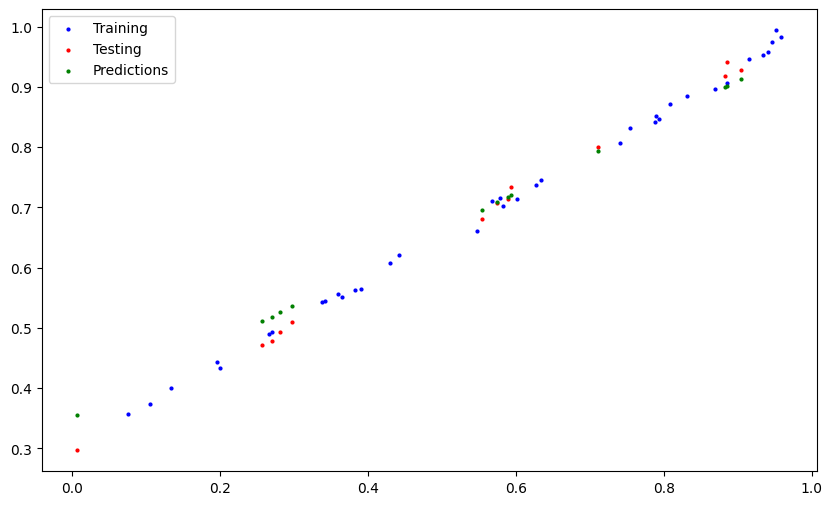

In [ ]:
plot_predictions(train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test,
                predictions=y_preds)

- Now those red dots are looking far closer than they used to be before!

# **4. Saving and Loading Models**

- For [saving and loading models in PyTorch](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference), there are three main methods:
    - [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) saves a serialized object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility.
    - [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) uses `pickle`'s unpickling features to deserialize and load pickled Python object files into memory.
    - [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict) loads a model's parameter dictionary (`.state_dict()`) using a saved `.state_dict()` object.

## **4.1. Saving a Model's `state_dict()`**

- The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

- How we can do that:

   1. Create a **directory** for saving models, say `models`.
   2. Create a **file path** to save the model to.
   3. Call `torch.save(obj, f)` where `obj` is the model's `state_dict()` and `f` is the filename.
   4. Call `torch.load(f)` where `f` is the filename.

 **Note:** A common extension for PyTorch models or objects to be saved is `.pt` or `.pth`, like `saved_model_01.pth`.


In [ ]:
from pathlib import Path

# 1. Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,   # create parent directories if needed
                 exist_ok = True   # if models directory already exists, don't error
                 )

In [ ]:
# 2. Create model save path
MODEL_NAME = "Model_1.pth" # common PyTorch save convention: '.pt' or '.pth' extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/Model_1.pth')

In [ ]:
# 3. Save the model state dict
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)
print(f"Model saved: {MODEL_SAVE_PATH}")

Model saved: models/Model_1.pth


In [ ]:
# Check the saved file path
!ls -l models # ls is list

total 8
-rw-r--r-- 1 root root 1560 Jun 25 16:08 Model_1.pth
-rw-r--r-- 1 root root 1560 Jun 25 16:06 Model_2.pth


In [ ]:
!ls -l models/Model_0.pth

ls: cannot access 'models/Model_0.pth': No such file or directory


## **4.2. Loading a Model's `state_dict()`**

- The saved model' `state_dict()` can be loaded using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the path.

- Why do we need to call `torch.load()` inside `torch.nn.Module.load_state_dict()`?
- Because we only saved the model's `state_dict()` which is a **dictionary of learned parameters** and **not the entire model**.
- We first have to load the `state_dict()` with `torch.load()` and then pass the `state_dict()` to a new instance of the model (which is a subclass of `nn.Module`).

- Why not save the entire model?

   - [Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, however, to quote the PyTorch documentation:

      The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...
     Because of this, your code can break in various ways when used in other projects or after refactors.

- So a flexible method is just saving and loading the `state_dict()`, which is basically a dictionary of model parameters.

- Let us test it out by creating new instance of `LinearRegressionModel()`, which is a subclass of `torch.nn.Module` and will hence have the in-built method `load_state_dit()`.

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_1 = RegressionModelV1(num_inputs=1, num_outputs=1)
loaded_model_1.state_dict() # Randomly initialized parameters

OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
             ('linear_layer.bias', tensor([0.9186]))])

In [ ]:
# Load the state_dict of the saved model (this will update the new instance of the model with trained weights)
loaded_model_1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model_1.state_dict() # Loaded (pre-trained) version of parameters

OrderedDict([('linear_layer.weight', tensor([[0.6231]])),
             ('linear_layer.bias', tensor([0.3508]))])

It looks like things matched up. Now to test the loaded model, let's perform inference with it (make predictions) on the test data.

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_1.eval()
# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test) # perform a forward pass on the test data with the loaded model

loaded_model_preds

tensor([[0.9005],
        [0.5107],
        [0.7207],
        [0.9025],
        [0.7084],
        [0.5188],
        [0.5358],
        [0.3547],
        [0.9141],
        [0.6964],
        [0.7935],
        [0.5262],
        [0.7181]])

In [ ]:
X_test.shape

torch.Size([13, 1])

- Now we made predictions with the loaded model, let us check if they are the same as the previous predictions.

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

- It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

- **Note:**
    - As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**.
    - That means we should only ever unpickle (load) trusted data and/or models, or from trusted sources we trust.

# **5. Writing Device Agnostic Code**

- **Device agnostic**, also known as **platform-agnostic** or **cross-platform**, code refers to programming code that is designed to work seamlessly **across different devices, operating systems, or platforms** regardless of the specific device or platform on which the code is executed.
- Traditionally, CPUs (central processing units) have been responsible for **general-purpose computing tasks**, while GPUs (graphics processing units) have been primarily used for **parallel processing** and graphics-intensive applications.
- However, with the rise of general-purpose GPU programming frameworks such as CUDA (Compute Unified Device Architecture) and OpenCL (Open Computing Language), GPUs can now be utilized for a broader range of computational tasks beyond graphics.

    - Particularly useful in scenarios where **performance optimization** is crucial, such as **scientific simulations**, **machine learning**, and **data processing**.

- Frameworks like PyTorch or TensorFlow in the field of machine learning provide abstractions that allow developers to write code that can be executed on CPUs or GPUs interchangeably without significant modifications.
  - **CPU and GPU agnostic code** is used to work efficiently and effectively across different types of processors, whether the  (CPUs) or  (GPUs).
  - It allows developers to take advantage of the high parallel processing capabilities of GPUs while ensuring that the code can still run efficiently on CPUs or other types of processors when GPUs are not available.



- Let us put everything we have done so far together, except making the code [**device-agnostic**](https://pytorch.org/docs/stable/notes/cuda.html#best-practices).
    - Setting `device="cuda"` if available, otherwise default to `device="cpu"`.
- If you are using Google Colab and to setup a GPU, go to **Runtime - Change runtime type - Hardware acceleration - GPU**.
    - While doing so, the runtime will likely be reset and all variables will be lost.
    - You can run all of the cells above by clicking `Runtime - Run before`.
- First, let us check whether GPU is available using `!nvidia-smi` or `torch.cuda.is_available(`).

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


- If GPU is not available, it says something like:

    ```
    NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that
    the latest NVIDIA driver is installed and running.
    ```

- Or, running following code cell returns `True` if GPU is availabe, otherwise it results `False`.

In [ ]:
torch.cuda.is_available()

False

## **5.1. Setting to use GPU if it is available**



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


- If we have got access to a GPU, the above should've printed out:

      ```
      cuda
      ```
- Otherwise, CPU will be used for the following computations.

## **5.2. Training and Testing Loop**

- Let us define a model.

In [ ]:
class RegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x: torch.Tensor):
    return self.linear_layer(x)

- Now let us create some data just like before.

In [ ]:
weight = 0.7
bias = 0.3

X = torch.rand(50)
y = weight * X + bias + torch.randn(len(X)) * 0.01
X[:10], y[:10]

train_prob = 0.80
train_obs = np.random.choice([0, 1], p=[1-train_prob, train_prob], size=len(X))
X_train, y_train = X[train_obs==1].unsqueeze(dim=1), y[train_obs==1].unsqueeze(dim=1)
X_test, y_test = X[train_obs==0].unsqueeze(dim=1), y[train_obs==0].unsqueeze(dim=1)
len(X_train), len(y_train), len(X_test), len(y_test)

(42, 42, 8, 8)

- Checking the device of the data using the `.device` function.

In [ ]:
X_train.device, y_train.device, X_test.device, y_test.device

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'))

In [ ]:
torch.manual_seed(42)
model_2= RegressionModelV2()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
model_2.parameters()

<generator object Module.parameters at 0x7dfa4ee997e0>

- The model's current device is checked using `next()` function that retrieves the next item from an iterator.

In [ ]:
next(model_2.parameters()).device

device(type='cpu')

- It looks like both the data and model are on the CPU by default.
- Let's change it to be on the GPU (if it is available) using `.to(device)`.
- The only different thing -- both the **data** and **model** should move to the target `device` using `.to(device)`.
- Hence, following cells work regardless of whether a GPU is available or not.

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

X_train.device, y_train.device, X_test.device, y_test.device

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'))

- If a CUDA-enabled GPU is accessible, an output of something like: `device(type='cuda', index=0)` will be printed out.

The instantiated model is also moved to the target device as:

In [ ]:
model_2.to(device)
next(model_1.parameters()).device

device(type='cpu')

- That way if the model is on the GPU, the data should be on the GPU (and vice versa).
- Otherwise, error like `Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!` will occur indicating  not all python objects (model/data) are on the device.

- Let us step things up for the whole training loop.

In [ ]:
torch.manual_seed(42)
model_2 = RegressionModelV2()
model_2.to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

epochs = 500

for epoch in range(1, epochs + 1):
    model_2.train()
    y_pred = model_2(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test)
        test_loss = criterion(test_pred, y_test)

    if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 50 | Train loss: 0.03602 | Test loss: 0.03666
Epoch: 100 | Train loss: 0.01750 | Test loss: 0.01318
Epoch: 150 | Train loss: 0.00782 | Test loss: 0.00891
Epoch: 200 | Train loss: 0.00756 | Test loss: 0.00785
Epoch: 250 | Train loss: 0.00756 | Test loss: 0.00794
Epoch: 300 | Train loss: 0.00774 | Test loss: 0.00761
Epoch: 350 | Train loss: 0.00775 | Test loss: 0.00763
Epoch: 400 | Train loss: 0.00774 | Test loss: 0.00761
Epoch: 450 | Train loss: 0.00775 | Test loss: 0.00763
Epoch: 500 | Train loss: 0.00774 | Test loss: 0.00761


 **Note:**
   - Slightly different results may be observed whether the model was trained on CPU or GPU and other random nature of ML even if with same random seed.
   - If the difference is large, look for errors, however, if it is small (ideally it is), ignore it.

- Let's check the learned parameters of the model and compare them to the original hard coded parameters.

In [ ]:
print("The model learned values for weight and bias:")
print(model_2.state_dict())
print("\nAnd original values for weight and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned values for weight and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7033]])), ('linear_layer.bias', tensor([0.2995]))])

And original values for weight and bias are:
weights: 0.7, bias: 0.3


- The parameters are close to the original values.

In [ ]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test).squeeze(dim=1)

y_preds

tensor([0.8577, 0.3932, 0.9110, 0.3039, 0.9652, 0.8545, 0.8542, 0.7141])

- If the predictions are made with data on the GPU, the output will notice `device='cuda:0'` towards the end.
- That means the data is on CUDA device 0 (the first GPU in the system has access to due to zero-indexing).
- If using multiple GPUs, the indexing  number may be larger.

- Now let us plot the model's predictions.

- **Note:**
    - Many data science libraries such as `pandas`, `matplotlib` and `NumPy` **are not capable of using data stored on GPU**.
    - Hence, it might run into some issues when the data is not stored on the CPU.
    - To fix this, we can call [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) on the target tensor to return its copy on the CPU.

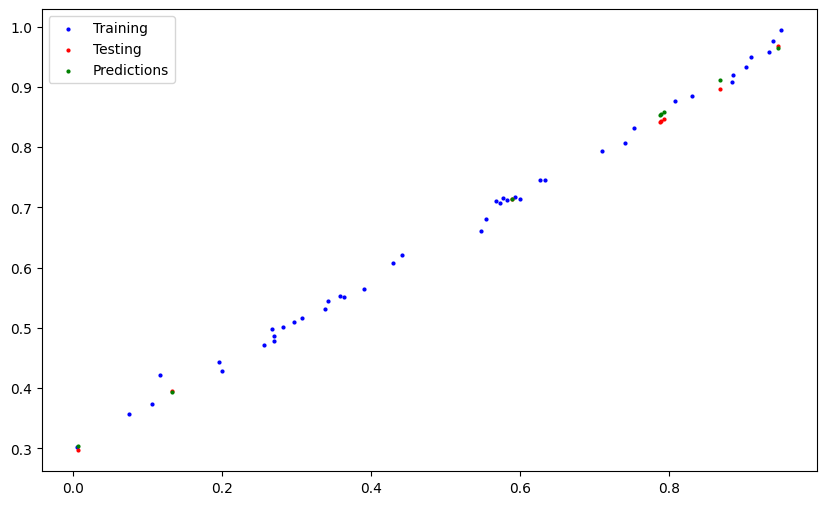

In [ ]:
# Without .cpu(), the plot will not work if data is on GPU
plot_predictions(train_data = X_train.cpu(),
                  train_labels = y_train.cpu(),
                  test_data = X_test.cpu(),
                  test_labels = y_test.cpu(),
                  predictions=y_preds.cpu())

- Look at those green dots, they line up almost perfectly with the red dots.



## **5.3. Saving Trained Model and Loading It**

Let us save the model to file so it can be used later.



In [ ]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7033]])),
             ('linear_layer.bias', tensor([0.2995]))])

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "Model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj = model_2.state_dict(), f = MODEL_SAVE_PATH)
print(f"Saved model: {MODEL_SAVE_PATH}")

Saved model: models/Model_2.pth


- To make sure everything worked well, let us load the saved model back in.
- To do so, remember to create a new instance of the `LinearRegressionModelV2()` class, load in the model state dict using `torch.nn.Module.load_state_dict()`.
- Then, send the new instance of the model to the target device (to ensure the code is device-agnostic).

In [ ]:
loaded_model_2 = LinearRegressionModelV2()
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device)

print(f"Loaded model:\n{loaded_model_2}")
print(f"Model on device:\n{next(loaded_model_2.parameters()).device}")
print(f"Parameters:\n{loaded_model_2.state_dict()}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu
Parameters:
OrderedDict([('linear_layer.weight', tensor([[0.7033]])), ('linear_layer.bias', tensor([0.2995]))])


Now we can evaluate the loaded model to see if its predictions line up with the predictions made prior to saving.

In [ ]:
loaded_model_2.eval()
with torch.inference_mode():
    loaded_model_2_preds = loaded_model_2(X_test)
y_preds == loaded_model_2_preds

tensor([[ True, False, False, False, False, False, False, False],
        [False,  True, False, False, False, False, False, False],
        [False, False,  True, False, False, False, False, False],
        [False, False, False,  True, False, False, False, False],
        [False, False, False, False,  True, False, False, False],
        [False, False, False, False, False,  True, False, False],
        [False, False, False, False, False, False,  True, False],
        [False, False, False, False, False, False, False,  True]])

# **6. Deep Neural Network**

- Neural Networks in general are composed of a collection of **neurons** that are organized in **layers**, each with their own learnable **weights and biases**.

 - **Note**:
    - A **neuron** can be thought of as a function that takes in **multiple inputs and yields a single output**.
    - A **layer** is simply a collection of **neurons with the same operation**, including **same hyperparameters**.

- So far the focus was only on a single layer model for regression problems. Now let us extend to multiple layers NN model.

 - **Example**:
  * Generate quadratic response data $y=x^2+\{\varepsilon\sim \cal{N}(0,0.08)\}$
  * Fit an NN model with only three linear layers.
  * Fit a model with activation function (say, ReLU).


In [ ]:
import numpy as np
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

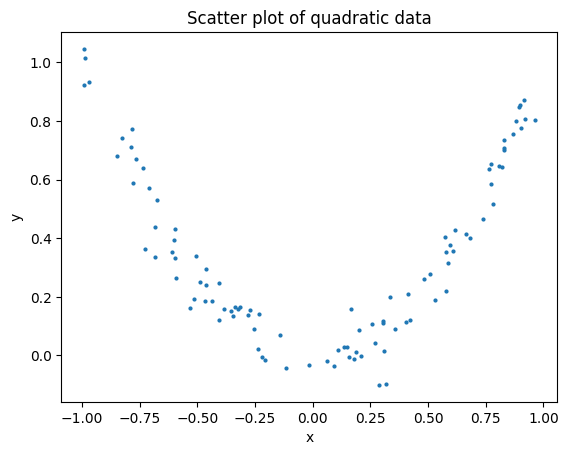

In [ ]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

X = 2 * torch.rand(100) - 1 # random uniform(-1,1) of n values
y = X**2 + torch.randn(len(X)) * 0.08
len(X), len(y)

plt.scatter(X, y, s=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of quadratic data');

In [ ]:
X

tensor([ 0.7645,  0.8300, -0.2343,  0.9186, -0.2191,  0.2018, -0.4869,  0.5873,
         0.8815, -0.7336,  0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,
         0.7709,  0.1478, -0.4668,  0.2549, -0.4607, -0.1173, -0.4062,  0.6634,
        -0.7894, -0.4610, -0.2824, -0.6013,  0.0944, -0.9877,  0.9031, -0.8495,
         0.7720,  0.1664, -0.3247,  0.6179,  0.1559,  0.8080,  0.1093, -0.3154,
         0.2687, -0.2712,  0.4209,  0.8928,  0.5781, -0.4372,  0.5773,  0.1789,
         0.5078, -0.6095, -0.9899, -0.3864, -0.7670,  0.8205,  0.2880,  0.4142,
         0.3163, -0.0174,  0.7826, -0.7105,  0.0630, -0.6825,  0.3084, -0.3444,
         0.3064, -0.2083,  0.8294, -0.5927, -0.5964, -0.5964,  0.8994,  0.3333,
         0.9623, -0.8253, -0.9919, -0.7824, -0.6727,  0.4050,  0.3581,  0.8309,
        -0.5164, -0.6817,  0.5306, -0.4042,  0.6069, -0.2373,  0.5720, -0.7770,
        -0.5046,  0.3049,  0.2114, -0.2550,  0.5961,  0.6798, -0.7252, -0.5339,
         0.9157, -0.3374, -0.3545, -0.96

In [ ]:
X = X.unsqueeze(dim=1)
y = y.unsqueeze(dim=1)
# Create train/test split
train_prob = 0.80
train_obs = np.random.choice([0, 1], p=[1-train_prob, train_prob], size=len(X))
X_train, y_train = X[train_obs==1], y[train_obs==1]
X_test, y_test = X[train_obs==0], y[train_obs==0]
len(X_train), len(y_train), len(X_test), len(y_test)

(82, 82, 18, 18)

## **6.1. Linear Regression with Multiple Layers**

- Let us define  the model subclassing `nn.module` with two layers.

In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self, num_inputs, hidden_units, num_outputs):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = num_inputs, out_features = hidden_units)  # takes in 2 features (X), produces 8 features
    self.layer_2 = nn.Linear(in_features = hidden_units, out_features = num_outputs)  # takes in 8 features, produces 1 feature (y)

  def forward(self, x):
    z = self.layer_1(x)                     # Input goes through layer_1 -  first computation
    z = self.layer_2(z)                     # first computation output goes through layer_2 - second computation
    return z                                # computation first goes in layer_1 then its output goes in layer_2

- There are two linear layers:
- The first `self.layer_1` takes 1 input feature (`in_features = 1`) and produces 8 output features (`out_features = 8`).
  - This is means 8 **hidden neurons (nodes or units)**.
  - This layer turns the input data from having 1 feature to 8 features.
  - The **number of hidden nodes** in a layer is a **hyperparameter** and there is no set in stone.
  - The choice depends on the model type and dataset begin worked with.

- The second `self.layer_2` takes 8 hidden nodes (`in_features = 8`),  which are actually the outputs of `self.layer_1`.
  - The only rule is the input nodes for the next layer (`self.layer_2`) is the same with the output nodes (`out_features`) of the previous layer (`self.layer_1`).
  - The final layer `self.layer_3` performs linear combinations and turn it to `out_features = 1` (the same shape as `y`).

- A visual example of what a similar regression neural network looks like [TensorFlow Playground website](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43661&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false).*

- Let us instantiate the model (create an instance of the model) and send it to the target `device`.

In [ ]:
model_3 = LinearRegressionModelV3(1, 8, 1).to(device)
model_3

LinearRegressionModelV3(
  (layer_1): Linear(in_features=1, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1447],
                      [-0.2590],
                      [ 0.4137],
                      [-0.3809],
                      [-0.6473],
                      [ 0.7299],
                      [-0.4547],
                      [-0.2005]])),
             ('layer_1.bias',
              tensor([-0.9948,  0.6693,  0.7576,  0.3644, -0.6973, -0.9869, -0.8122,  0.7457])),
             ('layer_2.weight',
              tensor([[ 0.1697,  0.2975,  0.1852,  0.0895, -0.0035, -0.2689, -0.3029, -0.3307]])),
             ('layer_2.bias', tensor([0.1447]))])

- Note the first layer has $2\times 8=16$ weight parameters (`layer_1.weight`) and 8 biases `layer_1.bias`.
- Where as the second layer has $8$ weight parameters (`layer_1.weight`) and 8 biases `layer_1.bias`.

In [ ]:
next(model_3.parameters()).device

device(type='cpu')

In [ ]:
torchinfo.summary(model_3, input_size=[1])

Layer (type:depth-idx)                   Output Shape              Param #
LinearRegressionModelV3                  [1]                       --
├─Linear: 1-1                            [8]                       16
├─Linear: 1-2                            [1]                       9
Total params: 25
Trainable params: 25
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

- In a neural network, each of the sequential operations introduces some overhead due to
    - **memory transfers**,
    - **intermediate data storage**,
    - and **function call overhead**.
- **Operator fusion**, also known as **kernel fusion**, is a technique of   
    - **combining multiple operations or operators into a single operation**,
    - reducing the number of individual operations that need to be executed.
- Using this concept of operator fusion, we call each block of the `forward()` method in succession as below.

In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 1, out_features = 8)  # takes in 2 features (X), produces 8 features
    self.layer_2 = nn.Linear(in_features = 8, out_features = 1)  # takes in 8 features, produces 1 feature (y)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # computation first goes in layer_1 then its output goes in layer_2

- Operator fusion
    - saves the time spent reassigning `x` (memory heavy),
    - eliminates redundant memory transfers
    - and minimizs the intermediate storage and focuses on only computing on `x`.

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = LinearRegressionModelV3()
model_3.to(device)

criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.01)

epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(1, epochs + 1):
  model_3.train()
  y_pred = model_3(X_train)
  loss = criterion(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test)
    test_loss = criterion(test_pred, y_test)

  if epoch % 50 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.cpu().detach())
    test_loss_values.append(test_loss.cpu().detach())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss:.5f} | MAE Test Loss: {test_loss:.5f} ")

Epoch: 50 | MAE Train Loss: 0.27880 | MAE Test Loss: 0.18511 
Epoch: 100 | MAE Train Loss: 0.26032 | MAE Test Loss: 0.17639 
Epoch: 150 | MAE Train Loss: 0.25757 | MAE Test Loss: 0.18384 
Epoch: 200 | MAE Train Loss: 0.25716 | MAE Test Loss: 0.18967 
Epoch: 250 | MAE Train Loss: 0.25716 | MAE Test Loss: 0.18964 
Epoch: 300 | MAE Train Loss: 0.25718 | MAE Test Loss: 0.19003 
Epoch: 350 | MAE Train Loss: 0.25718 | MAE Test Loss: 0.19001 
Epoch: 400 | MAE Train Loss: 0.25717 | MAE Test Loss: 0.18998 
Epoch: 450 | MAE Train Loss: 0.25716 | MAE Test Loss: 0.18968 
Epoch: 500 | MAE Train Loss: 0.25716 | MAE Test Loss: 0.18965 
Epoch: 550 | MAE Train Loss: 0.25718 | MAE Test Loss: 0.19004 
Epoch: 600 | MAE Train Loss: 0.25718 | MAE Test Loss: 0.19001 
Epoch: 650 | MAE Train Loss: 0.25717 | MAE Test Loss: 0.18998 
Epoch: 700 | MAE Train Loss: 0.25716 | MAE Test Loss: 0.18996 
Epoch: 750 | MAE Train Loss: 0.25716 | MAE Test Loss: 0.18965 
Epoch: 800 | MAE Train Loss: 0.25716 | MAE Test Loss: 0.

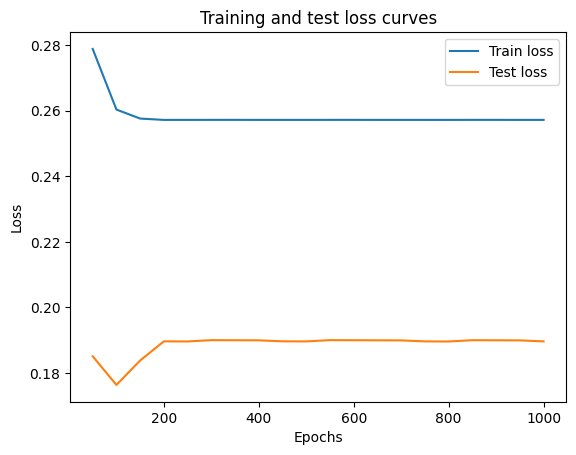

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Turn on evaluation mode and make predictions (inference)
model_3.eval()
with torch.inference_mode():
    y_preds = model_3(X_test)

print(f"Length of predictions: {len(y_preds)}, Shape: {y_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{y_preds[:10].squeeze()}")
print(f"\nFirst 10 test labels:\n{y_test[:10].squeeze()}")

Length of predictions: 18, Shape: torch.Size([18, 1])
Length of test samples: 18, Shape: torch.Size([18, 1])

First 10 predictions:
tensor([0.3645, 0.3513, 0.3434, 0.2772, 0.2731, 0.3536, 0.2873, 0.3741, 0.2818,
        0.3303])

First 10 test labels:
tensor([0.6358, 0.3163, 0.2605, 0.2460, 0.2397, 0.4279, 0.1562, 0.8481, 0.1342,
        0.1168])


Let us plot its predictions.
- The model and data may be using GPU as a target `device`.
- The plotting will be done using `matplotlib` that cannot handle data on the GPU.
- As a result, we have to move  all objects to the CPU first.
- For this purpose, the [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) is used then to pass to `plot_predictions()` function.

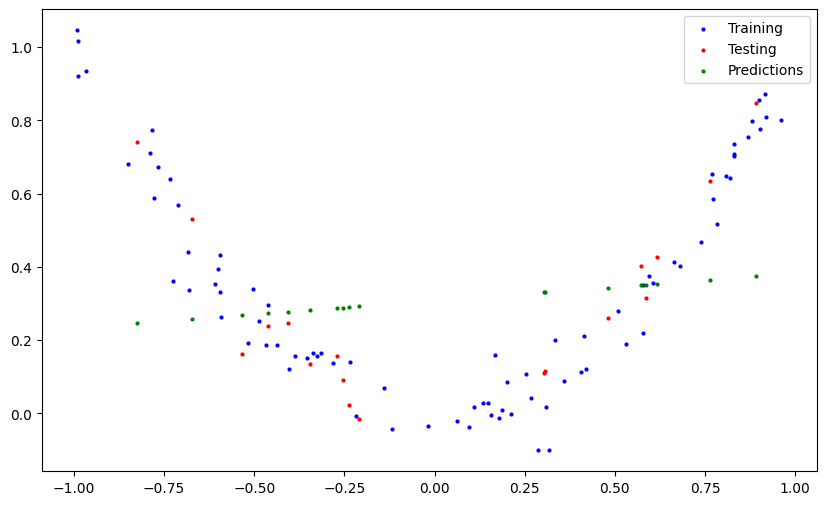

In [ ]:
plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu()
                 );

## **6.2. The Missing Piece: Introducing Non-Linearity**


- So far we have seen the neural network models using **only linear (straight) lines (functions)**.
- The data we have been working with is **non-linear (quadratic)**.
- But how about we give it the capacity to draw **non-straight (non-linear) lines**?

- The solution calls for an **activation function** that introduces non-linearity to an output of a function.

- One of the most common and best performing activation function is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).
- Following code applies intersperse ReLU between the layers as shown in the `forward()` method.



In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 1, out_features = 16)
    self.layer_2 = nn.Linear(in_features = 16, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_2(self.relu(self.layer_1(x)))

In [ ]:
model_3 = LinearRegressionModelV3()
model_3

LinearRegressionModelV3(
  (layer_1): Linear(in_features=1, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
torchinfo.summary(model_3, input_size=[1])

Layer (type:depth-idx)                   Output Shape              Param #
LinearRegressionModelV3                  [1]                       --
├─Linear: 1-1                            [16]                      32
├─ReLU: 1-2                              [16]                      --
├─Linear: 1-3                            [1]                       17
Total params: 49
Trainable params: 49
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

- The output of the instantiated model does not let us know where the activation function is applied.

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = LinearRegressionModelV3()
model_3.to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.01)

epochs = 1000

for epoch in range(1, epochs + 1):
  model_3.train()
  y_pred = model_3(X_train)
  loss = criterion(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test)
    test_loss = criterion(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss:.5f} | MAE Test Loss: {test_loss:.5f} ")

Epoch: 10 | MAE Train Loss: 0.24809 | MAE Test Loss: 0.17421 
Epoch: 20 | MAE Train Loss: 0.23939 | MAE Test Loss: 0.15718 
Epoch: 30 | MAE Train Loss: 0.23521 | MAE Test Loss: 0.14956 
Epoch: 40 | MAE Train Loss: 0.23290 | MAE Test Loss: 0.14852 
Epoch: 50 | MAE Train Loss: 0.23093 | MAE Test Loss: 0.14756 
Epoch: 60 | MAE Train Loss: 0.22901 | MAE Test Loss: 0.14658 
Epoch: 70 | MAE Train Loss: 0.22709 | MAE Test Loss: 0.14562 
Epoch: 80 | MAE Train Loss: 0.22517 | MAE Test Loss: 0.14464 
Epoch: 90 | MAE Train Loss: 0.22328 | MAE Test Loss: 0.14364 
Epoch: 100 | MAE Train Loss: 0.22140 | MAE Test Loss: 0.14257 
Epoch: 110 | MAE Train Loss: 0.21953 | MAE Test Loss: 0.14156 
Epoch: 120 | MAE Train Loss: 0.21762 | MAE Test Loss: 0.14075 
Epoch: 130 | MAE Train Loss: 0.21574 | MAE Test Loss: 0.13990 
Epoch: 140 | MAE Train Loss: 0.21385 | MAE Test Loss: 0.13910 
Epoch: 150 | MAE Train Loss: 0.21196 | MAE Test Loss: 0.13818 
Epoch: 160 | MAE Train Loss: 0.21006 | MAE Test Loss: 0.13724 
E

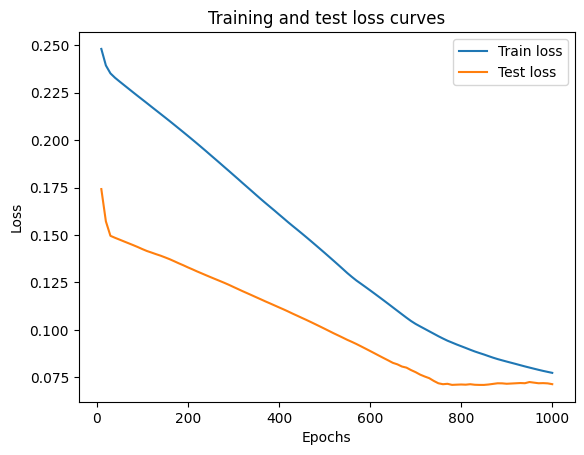

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

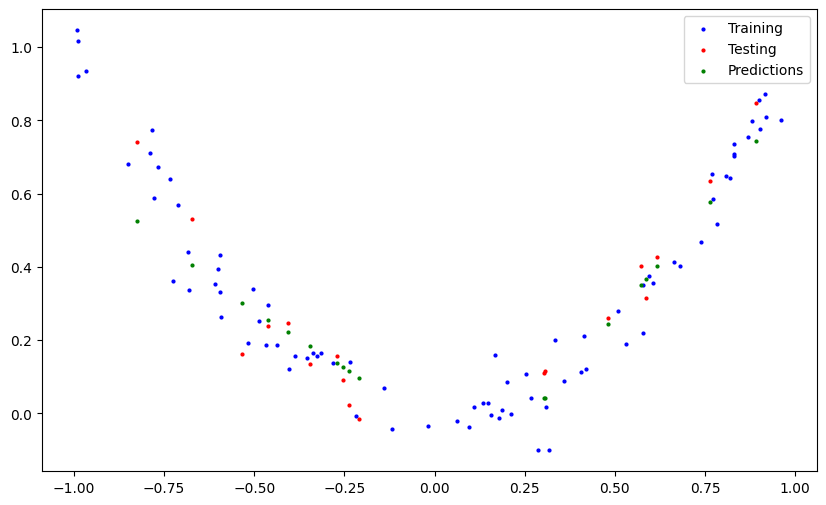

In [ ]:
model_3.eval()
with torch.inference_mode():
    y_preds = model_3(X_test)

plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu()
                 );

As an exercise:
- Train the model using `nn.MSELoss()` loss function and `torch.optim.SGD()` optimizer as before.
- Try to observe the difference in the output by changing the learning rate; `lr= 0.001`.
- Look the changes in the training and testing losses.

## **6.3 Defining Model Using `nn.Sequential()`**


- We can also define the same model architecture as above using [`nn.Sequential()`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).
- It performs performs a **forward pass** computation of the input data through the layers in their order of appearance.
- So let us now replicate `LinearRegressionModelV3` with `nn.Sequential()`.

In [ ]:
model_4 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 8),
    nn.ReLU(),
    nn.Linear(in_features = 8, out_features = 1),
    )

model_4

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

- We can also use to define the model subclassing `nn.Module` and using `nn.Sequential()` as:

In [ ]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
      nn.Linear(in_features = 1, out_features = 8),
      nn.ReLU(),
      nn.Linear(in_features = 8, out_features = 1)
        )

  def forward(self, x):
    return self.model(x)

model_5 = LinearRegressionModelV3().to(device)
model_5

LinearRegressionModelV3(
  (model): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)

- The definition using `nn.Sequential()` looks much simpler than subclassing `nn.Module`.
- It **always runs in sequential order** which is fantastic for straight-forward computations.
- But if other non-straight-forward sequential computations are needed, it is required to define a custom `nn.Module` subclass.

In [ ]:
torchinfo.summary(model_5, [1])

Layer (type:depth-idx)                   Output Shape              Param #
LinearRegressionModelV3                  [1]                       --
├─Sequential: 1-1                        [1]                       --
│    └─Linear: 2-1                       [8]                       16
│    └─ReLU: 2-2                         [8]                       --
│    └─Linear: 2-3                       [1]                       9
Total params: 25
Trainable params: 25
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# **7. End to End Example**


## **7.1. Loading Data and Preprocessing**

- Women Wealth Index Data

    - **Wealth index** is a composite measure often used in socio-economic and demographic studies to assess the relative wealth of households.
    - It is typically calculated using data on household assets, living conditions, and other indicators of wealth.
    - **Standard Wealth Index Construction**:
        - It is often constructed using a method called Principal Component Analysis (PCA), which combines various asset indicators into a single score.
        - Positive values indicate wealthier households, while negative values indicate poorer households.
    - **Categorical Wealth Index**:
        - The continuous wealth index can be divided into quintiles (five equal groups) or quartiles (four equal groups).
        - For example: Quintiles: Poorest, Poorer, Middle, Richer, Richest; Quartiles: Lowest, Second, Third, Highest

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/awolseid/Datasets/main/WomenDHS.csv"

wealth_df = pd.read_csv(url)
wealth_df

,CaseID,Age,MaritalStatus,Residence,EducationLevel,NumChild,WealthIndexCategorical,WealthIndexScore
0,1,38,Married,Rural,No Education,8,Poorer,-51074
1,2,17,Single,Rural,Primary,0,Poorer,-51074
2,3,42,Married,Rural,Primary,6,Poorer,-50742
3,4,46,Married,Rural,No Education,9,Poorer,-50137
4,5,17,Other,Rural,No Education,1,Poorer,-50137
...,...,...,...,...,...,...,...,...
15678,15679,17,Single,Urban,Primary,0,Richest,85862
15679,15680,33,Married,Urban,No Education,2,Richest,147305
15680,15681,25,Married,Urban,Primary,1,Richest,186851
15681,15682,18,Single,Urban,Primary,0,Richest,186851


In [ ]:
wealth_df.shape

(15683, 8)

- **Null values**

In [ ]:
wealth_df.isna()

,CaseID,Age,MaritalStatus,Residence,EducationLevel,NumChild,WealthIndexCategorical,WealthIndexScore
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
15678,False,False,False,False,False,False,False,False
15679,False,False,False,False,False,False,False,False
15680,False,False,False,False,False,False,False,False
15681,False,False,False,False,False,False,False,False


In [ ]:
wealth_df.isna().sum()

CaseID                    0
Age                       0
MaritalStatus             0
Residence                 0
EducationLevel            0
NumChild                  0
WealthIndexCategorical    0
WealthIndexScore          0
dtype: int64

In [ ]:
wealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15683 entries, 0 to 15682
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CaseID                  15683 non-null  int64 
 1   Age                     15683 non-null  int64 
 2   MaritalStatus           15683 non-null  object
 3   Residence               15683 non-null  object
 4   EducationLevel          15683 non-null  object
 5   NumChild                15683 non-null  int64 
 6   WealthIndexCategorical  15683 non-null  object
 7   WealthIndexScore        15683 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 980.3+ KB


- **Duplicates**

In [ ]:
wealth_df.duplicated(subset=['CaseID']).sum()

0

- **Unique values**

In [ ]:
wealth_df.nunique()

CaseID                    15683
Age                          35
MaritalStatus                 3
Residence                     2
EducationLevel                4
NumChild                     13
WealthIndexCategorical        5
WealthIndexScore          11935
dtype: int64

In [ ]:
wealth_df.Residence.value_counts()

Residence
Rural    10335
Urban     5348
Name: count, dtype: int64

In [ ]:
wealth_df.Residence.value_counts(normalize=True)

Residence
Rural    0.658994
Urban    0.341006
Name: proportion, dtype: float64

- **Categorical and quantitative features**

In [ ]:
categorical_features = wealth_df.select_dtypes(include="object").columns
print(categorical_features)
numerical_features = wealth_df.select_dtypes(exclude="object").columns
print(numerical_features)

Index(['MaritalStatus', 'Residence', 'EducationLevel',
       'WealthIndexCategorical'],
      dtype='object')
Index(['CaseID', 'Age', 'NumChild', 'WealthIndexScore'], dtype='object')


In [ ]:
wealth_df["CaseID"] = wealth_df["CaseID"].astype(str)

categorical_features = wealth_df.select_dtypes(include="object").columns
print(categorical_features)
numerical_features = wealth_df.select_dtypes(exclude="object").columns
print(numerical_features)

Index(['CaseID', 'MaritalStatus', 'Residence', 'EducationLevel',
       'WealthIndexCategorical'],
      dtype='object')
Index(['Age', 'NumChild', 'WealthIndexScore'], dtype='object')


- **Descriptives for quantitative features**

In [ ]:
wealth_df.describe()

,Age,NumChild,WealthIndexScore
count,15683.000000,15683.000000,15683.000000
mean,27.937321,2.325639,10621.310209
std,9.159282,2.472988,105301.347989
min,15.000000,0.000000,-213343.000000
25%,20.000000,0.000000,-61526.500000
50%,27.000000,2.000000,-33659.000000
75%,35.000000,4.000000,88720.000000
max,49.000000,12.000000,309962.000000


- **Correlation**

In [ ]:
wealth_df[list(numerical_features)].corr()

,Age,NumChild,WealthIndexScore
Age,1.000000,0.708658,-0.047113
NumChild,0.708658,1.000000,-0.324580
WealthIndexScore,-0.047113,-0.324580,1.000000


- **Histogram**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

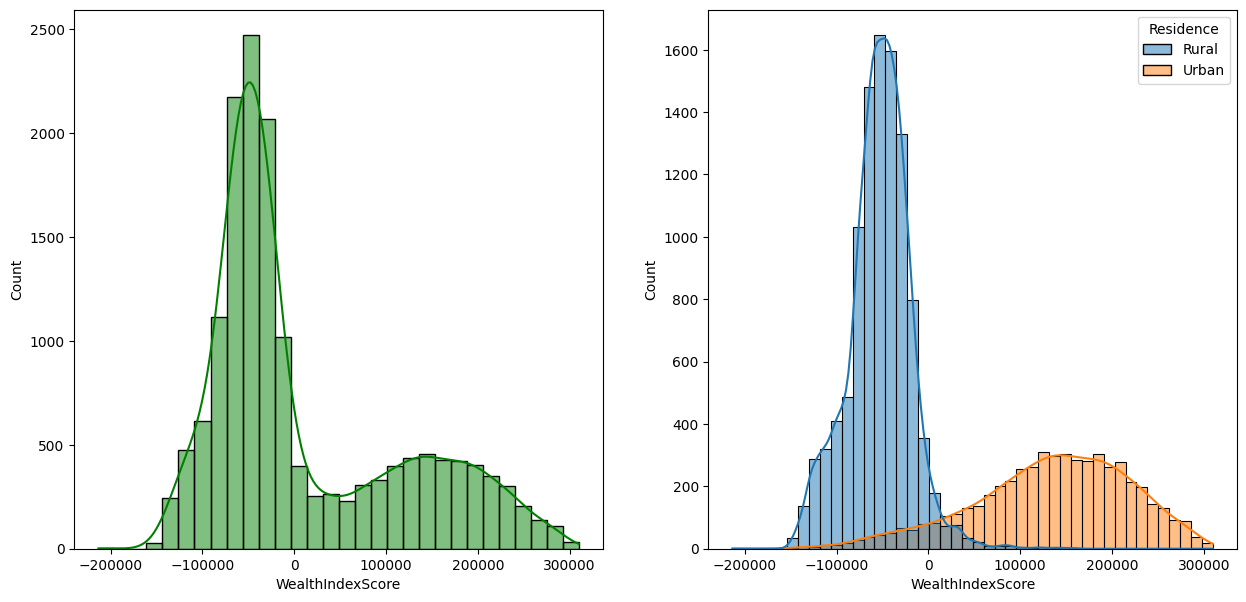

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=wealth_df, x='WealthIndexScore', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=wealth_df, x='WealthIndexScore', kde=True, hue='Residence')
plt.show()

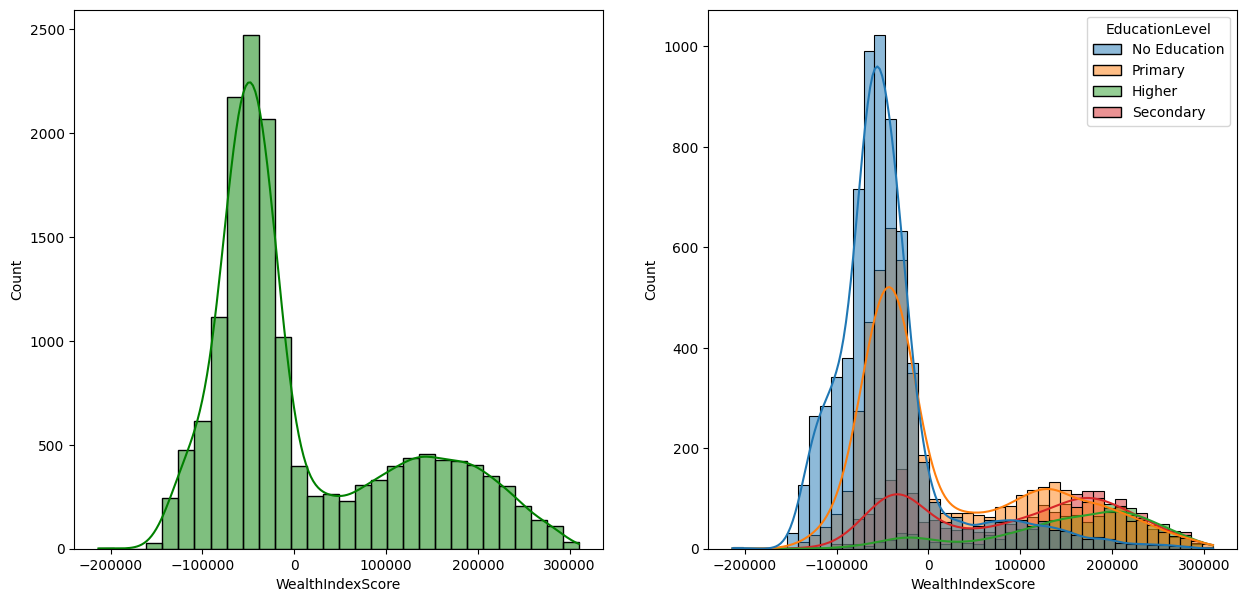

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=wealth_df, x='WealthIndexScore', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=wealth_df, x='WealthIndexScore', kde=True, hue='EducationLevel')
plt.show()

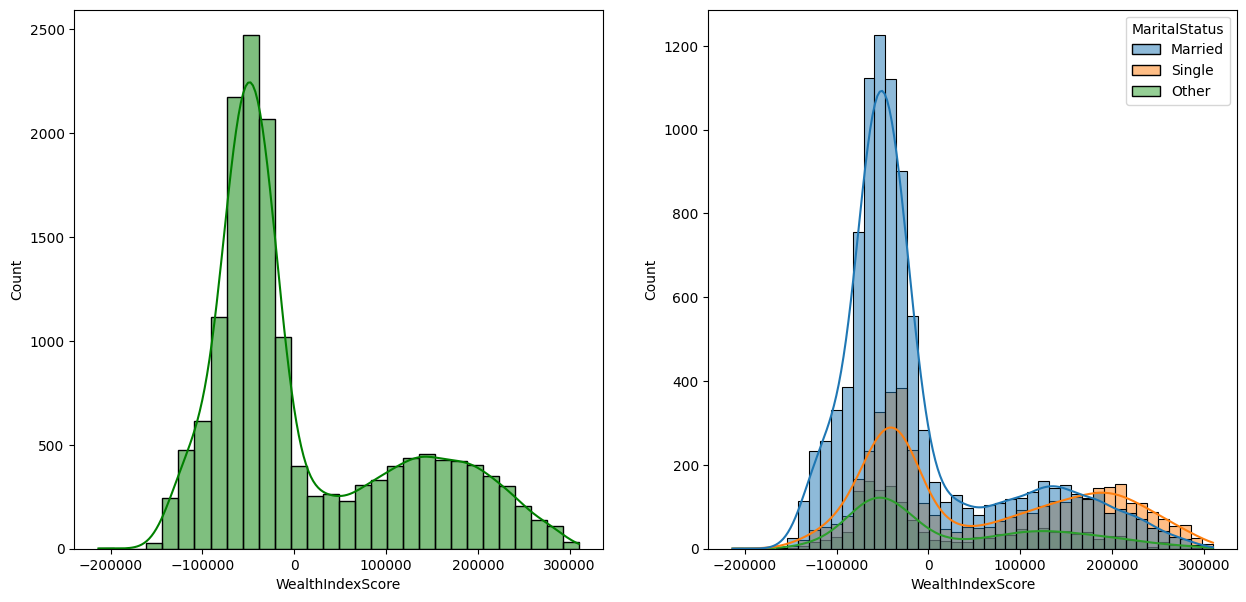

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=wealth_df, x='WealthIndexScore', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=wealth_df, x='WealthIndexScore', kde=True, hue='MaritalStatus')
plt.show()

## **7.2. Train, Validation (Optional) and Test Splits**

- First, let us extract data containing variables to be considered

In [ ]:
new_df = wealth_df.drop(columns=["CaseID", "WealthIndexCategorical"])
new_df

,Age,MaritalStatus,Residence,EducationLevel,NumChild,WealthIndexScore
0,38,Married,Rural,No Education,8,-51074
1,17,Single,Rural,Primary,0,-51074
2,42,Married,Rural,Primary,6,-50742
3,46,Married,Rural,No Education,9,-50137
4,17,Other,Rural,No Education,1,-50137
...,...,...,...,...,...,...
15678,17,Single,Urban,Primary,0,85862
15679,33,Married,Urban,No Education,2,147305
15680,25,Married,Urban,Primary,1,186851
15681,18,Single,Urban,Primary,0,186851


In [ ]:
X_df = new_df.drop(columns=["WealthIndexScore"])
X_df

,Age,MaritalStatus,Residence,EducationLevel,NumChild
0,38,Married,Rural,No Education,8
1,17,Single,Rural,Primary,0
2,42,Married,Rural,Primary,6
3,46,Married,Rural,No Education,9
4,17,Other,Rural,No Education,1
...,...,...,...,...,...
15678,17,Single,Urban,Primary,0
15679,33,Married,Urban,No Education,2
15680,25,Married,Urban,Primary,1
15681,18,Single,Urban,Primary,0


In [ ]:
y_df = new_df[["WealthIndexScore"]]
y_df

,WealthIndexScore
0,-51074
1,-51074
2,-50742
3,-50137
4,-50137
...,...
15678,85862
15679,147305
15680,186851
15681,186851


In [ ]:
from sklearn.model_selection import train_test_split

X_train_full_df, X_test_df, y_train_full_df, y_test_df1 = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42)

X_train_df, X_val_df, y_train_df1, y_val_df1 = train_test_split(
    X_train_full_df, y_train_full_df, test_size=0.2, random_state=42)

In [ ]:
len(X_train_df), len(X_val_df), len(X_test_df), len(y_train_df1), len(y_val_df1), len(y_test_df1)

(10036, 2510, 3137, 10036, 2510, 3137)

In [ ]:
X_train_df.shape, X_test_df.shape, X_val_df.shape

((10036, 5), (3137, 5), (2510, 5))

In [ ]:
 y_train_df1.shape, y_test_df1.shape, y_val_df1.shape

((10036, 1), (3137, 1), (2510, 1))

In [ ]:
y_train_df1

,WealthIndexScore
1834,-27457
8430,-35342
11414,-51343
5866,-67283
4530,-35181
...,...
15253,-49938
8888,-73659
5680,34489
8943,204645


In [ ]:
y_val_df1

,WealthIndexScore
13257,-13014
2108,-64735
591,107137
4632,-85064
992,-37993
...,...
11786,175871
9221,211095
12386,-57343
8664,-32115


## **7.3. Feature Transformations**




In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
cat_features = X_train_df.select_dtypes(include="object").columns
num_features = X_train_df.select_dtypes(exclude="object").columns

In [ ]:
cat_features, num_features

(Index(['MaritalStatus', 'Residence', 'EducationLevel'], dtype='object'),
 Index(['Age', 'NumChild'], dtype='object'))

- **Quantitative inputs**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df[num_features])
X_train_scaled

array([[ 0.76914425,  1.07423358],
       [ 0.76914425,  0.26787545],
       [-0.98130017, -0.94166175],
       ...,
       [ 0.00332482,  0.67105452],
       [-0.54368907, -0.94166175],
       [-0.8718974 , -0.53848268]])

- In validation or test sets, not '`.fit_transform`', rather `.transform`.

In [ ]:
X_val_scaled = scaler.transform(X_val_df[num_features])
X_val_scaled

array([[ 1.86317202, -0.53848268],
       [-0.76249462, -0.94166175],
       [ 0.44093592, -0.13530362],
       ...,
       [-1.09070295, -0.53848268],
       [-0.54368907, -0.13530362],
       [ 1.20675536,  1.07423358]])

- **Qualitative inputs**

In [ ]:
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_df[cat_features])
X_train_encoded

<10036x9 sparse matrix of type '<class 'numpy.float64'>'
	with 30108 stored elements in Compressed Sparse Row format>

- The output indicates that the resulting encoded data is in the form of a **sparse matrix**,
    - which is common when using `OneHotEncoder` to save memory.
    - Sparse matrices are efficient representations of data with many zeros.
- We can convert the sparse matrix to a **dense array** using the `.toarray()` method.
    - However, this may **not be memory-efficient** for very large datasets.

In [ ]:
X_train_encoded.toarray()

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
X_val_encoded = encoder.transform(X_val_df[cat_features])
X_val_encoded.toarray()

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

- **Encoding qualitative variables and standardizing quantitative variables**

In [ ]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ("Encoder", OneHotEncoder(), cat_features),
     ("Scaler", StandardScaler(), num_features)]
                                )
transformer

ColumnTransformer(transformers=[('Encoder', OneHotEncoder(),
                                 Index(['MaritalStatus', 'Residence', 'EducationLevel'], dtype='object')),
                                ('Scaler', StandardScaler(),
                                 Index(['Age', 'NumChild'], dtype='object'))])

In [ ]:
X_train_array = transformer.fit_transform(X_train_df)
X_val_array = transformer.transform(X_val_df)
X_train_array

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.76914425,  1.07423358],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.76914425,  0.26787545],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.98130017, -0.94166175],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.00332482,  0.67105452],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.54368907, -0.94166175],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.8718974 , -0.53848268]])

- **Note**:
    - Transformations to be done on train and validation/test sets may be somewhat different.
    - Hence, feature transformations should be done separately for the training and validation/test sets.

## **7.4. Convert Data to tensors**

- One of the most common errors in deep learning is **shape errors**.
- The mismatch of shapes in tensor operations will result in errors.
- So the first question is "**What shapes are the inputs and the outputs?**"

In [ ]:
y_train_array = y_train_df1.values
y_val_array = y_val_df1.values
y_test_array = y_test_df1.values

- Let us check out the shapes of the inputs and outputs.

In [ ]:
X_train_array.shape, y_train_array.shape

((10036, 11), (10036, 1))

In [ ]:
X_val_array.shape, y_val_array.shape

((2510, 11), (2510, 1))

In [ ]:
import torch

X_train = torch.tensor(X_train_array, dtype=torch.float32)
X_val = torch.tensor(X_val_array, dtype=torch.float32)

y_train = torch.tensor(y_train_array, dtype=torch.float32)
y_val = torch.tensor(y_val_array, dtype=torch.float32)

## **7.5. Define Model, Specify Loss Function and Optimizer**

  - The function [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html), where `in_features` is the **number of dimensions of the input data** and `out_features` is the **number of dimensions of the output**, is used usually.
  - `nn.Linear()`  is also called **linear transform**, **fully connected layer**, **dense layer** (in tensor flow).


In [ ]:
import torch.nn as nn

class RegressionModel_1(nn.Module):
  def __init__(self, num_inputs, num_outputs=1):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=num_inputs, out_features=num_outputs)

  def forward(self, x):
    return self.linear_layer(x)

- **Instantiating Model**


In [ ]:
torch.manual_seed(42)
num_obs, num_inputs = X_train.shape

wealth_model_1 = RegressionModel_1(num_inputs=num_inputs)
print(wealth_model_1)

RegressionModel_1(
  (linear_layer): Linear(in_features=11, out_features=1, bias=True)
)


In [ ]:
wealth_model_1.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[ 0.2305,  0.2503, -0.0706,  0.2770, -0.0661,  0.0608, -0.1468,  0.1771,
                        0.2658, -0.2212,  0.2621]])),
             ('linear_layer.bias', tensor([0.0564]))])

In [ ]:
list(wealth_model_1.parameters())

[Parameter containing:
 tensor([[ 0.2305,  0.2503, -0.0706,  0.2770, -0.0661,  0.0608, -0.1468,  0.1771,
           0.2658, -0.2212,  0.2621]], requires_grad=True),
 Parameter containing:
 tensor([0.0564], requires_grad=True)]

In [ ]:
rand_vector = torch.randn(num_inputs, 1)
rand_vector

tensor([[ 2.2082],
        [-0.6380],
        [ 0.4617],
        [ 0.2674],
        [ 0.5349],
        [ 0.8094],
        [ 1.1103],
        [-1.6898],
        [-0.9890],
        [ 0.9580],
        [ 1.3221]])

In [ ]:
wealth_model_1(rand_vector.squeeze(dim=1))

tensor([-0.1293], grad_fn=<ViewBackward0>)

In [ ]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

In [ ]:
torchinfo.summary(wealth_model_1, input_size= [num_inputs])

Layer (type:depth-idx)                   Output Shape              Param #
RegressionModel_1                        [1]                       --
├─Linear: 1-1                            [1]                       12
Total params: 12
Trainable params: 12
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

- After instantiating a model, a **loss function** (`loss=`) to be minimized and an **optimizer** for parameters (`model.parameters()`) are needed to be specified.


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params = wealth_model_1.parameters(),  lr = 0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## **7.6. Train and Validate Model**

In [ ]:
torch.manual_seed(42)

num_obs, num_inputs = X_train.shape

wealth_model_1 = RegressionModel_1(num_inputs)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params = wealth_model_1.parameters(),  lr = 0.01)

epochs = 300
epoch_count = []

train_losses = []
val_losses = []


for epoch in range(1, epochs + 1):
  wealth_model_1.train()
  y_pred = wealth_model_1(X_train)
  loss = criterion(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  wealth_model_1.eval()
  with torch.inference_mode():
    y_pred = wealth_model_1(X_val)
    val_loss = criterion(y_val, y_pred)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f"Epoch: {epoch}, Train Loss: {loss}, Val Loss: {val_loss}")

Epoch: 10, Train Loss: 9419051008.0, Val Loss: 9671433216.0
Epoch: 20, Train Loss: 8041740288.0, Val Loss: 8300143104.0
Epoch: 30, Train Loss: 7017045504.0, Val Loss: 7266148864.0
Epoch: 40, Train Loss: 6223823360.0, Val Loss: 6458349568.0
Epoch: 50, Train Loss: 5594711552.0, Val Loss: 5813654528.0
Epoch: 60, Train Loss: 5088523264.0, Val Loss: 5292615680.0
Epoch: 70, Train Loss: 4677737984.0, Val Loss: 4868346880.0
Epoch: 80, Train Loss: 4342619136.0, Val Loss: 4521259008.0
Epoch: 90, Train Loss: 4068287744.0, Val Loss: 4236419584.0
Epoch: 100, Train Loss: 3843160064.0, Val Loss: 4002113792.0
Epoch: 110, Train Loss: 3658040832.0, Val Loss: 3808993792.0
Epoch: 120, Train Loss: 3505544448.0, Val Loss: 3649527808.0
Epoch: 130, Train Loss: 3379702528.0, Val Loss: 3517611520.0
Epoch: 140, Train Loss: 3275668736.0, Val Loss: 3408280832.0
Epoch: 150, Train Loss: 3189500416.0, Val Loss: 3317488128.0
Epoch: 160, Train Loss: 3117984768.0, Val Loss: 3241933056.0
Epoch: 170, Train Loss: 305850009

- The loss is going down with every epoch.
- Let us plot it.

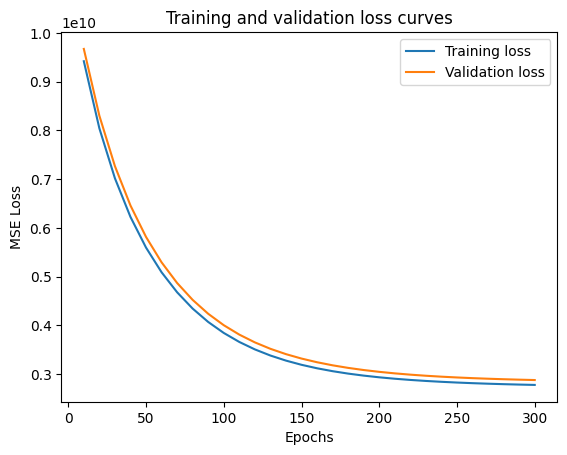

In [ ]:
plt.plot(epoch_count, train_losses, label="Training loss")
plt.plot(epoch_count, val_losses, label="Validation loss")
plt.title("Training and validation loss curves")
plt.ylabel("MSE Loss")
plt.xlabel("Epochs")
plt.legend();

- The **loss curves** show the loss going down over the training epochs.
- The model would probably get even lower losses if it is trained for longer.

    - Try changing the number of `epochs` 300, what happens to the loss curves?


In [ ]:
print(wealth_model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[  2731.3372,    921.8598,  18110.7363, -62496.0859,  84259.7578,
          25706.5371, -24284.2363,    774.7129,  19566.8809,  18951.6719,
         -15148.1787]])), ('linear_layer.bias', tensor([21763.5547]))])


## **7.7. Testing Model and Performance Metrics**

- To test the performance of the trained model, the entire test set `X_test` can be passed through the model to see how close the predictions are to `y_test`.

- Three things to remember when when testing:

   1. Set model in **evaluation mode** (`model.eval()`).
      - Because certain layers, like `Dropout` and `BatchNorm`, behave differently during training and evaluation.
   2. Use **inference mode** context manager (with `torch.inference_mode(): ...`).
   3. Both the data and model should be on the **same device** (CPU or GPU).
      - This is not to run into **cross-device errors**.

In [ ]:
# wealth_model_1.eval()
# with torch.inference_mode():
#   y_preds = wealth_model_1(X_test_df)

# y_preds

In [ ]:
# X_test = torch.tensor(X_test_df.values)

- The error like below occurred

    ```
    TypeError: can't convert np.ndarray of type numpy.object_.
    The only supported types are: float64, float32, float16,
    complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

    ```
- Because there are qualitative values with string values (not numerically coded).



- We have to standardize and encode features using `.transform`, not `.fit_transform`.

In [ ]:
X_test_array = transformer.transform(X_test_df)
X_test_array, X_test_array.shape

(array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         -0.65309184,  0.67105452],
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         -0.21548074, -0.13530362],
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
          1.20675536,  1.47741265],
        ...,
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
          0.98794981,  2.28377078],
        [ 0.        ,  1.        ,  0.        , ...,  0.        ,
          0.22213037,  0.26787545],
        [ 0.        ,  1.        ,  0.        , ...,  0.        ,
          1.53496369, -0.13530362]]),
 (3137, 11))

- After transformation, the array should be converted to tensor format with type `.float32`.

In [ ]:
y_test = torch.tensor(y_test_array, dtype=torch.float32)
X_test = torch.tensor(X_test_array, dtype=torch.float32)
X_test, X_test.shape

(tensor([[ 1.0000,  0.0000,  0.0000,  ...,  0.0000, -0.6531,  0.6711],
         [ 1.0000,  0.0000,  0.0000,  ...,  0.0000, -0.2155, -0.1353],
         [ 1.0000,  0.0000,  0.0000,  ...,  0.0000,  1.2068,  1.4774],
         ...,
         [ 1.0000,  0.0000,  0.0000,  ...,  0.0000,  0.9879,  2.2838],
         [ 0.0000,  1.0000,  0.0000,  ...,  0.0000,  0.2221,  0.2679],
         [ 0.0000,  1.0000,  0.0000,  ...,  0.0000,  1.5350, -0.1353]]),
 torch.Size([3137, 11]))

In [ ]:
with torch.inference_mode():
    test_preds = wealth_model_1(X_test)

test_preds

tensor([[-84827.8672],
        [-64319.5469],
        [-61795.5078],
        ...,
        [ 68598.7500],
        [-63942.9922],
        [138859.6250]])

In [ ]:
test_residuals = y_test - test_preds

- We have made predictions with the trained model, now let us look graphically.

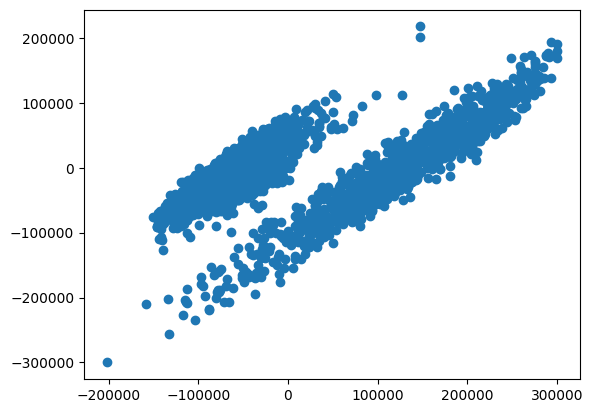

In [ ]:
plt.scatter(y_test, test_residuals);

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

with torch.inference_mode():
    test_preds = wealth_model_1(X_test)
    val_preds = wealth_model_1(X_val)
    train_preds = wealth_model_1(X_train)

metrics_dict = {"Metrics": ["MAE", "MSE", "R2"],
                "Training": [],
                "Validation": [],
                "Testing": []}

metrics_dict["Training"].append(mean_absolute_error(y_train, train_preds))
metrics_dict["Training"].append(mean_squared_error(y_train, train_preds))
metrics_dict["Training"].append(r2_score(y_train, train_preds))


metrics_dict["Validation"].append(mean_absolute_error(y_val, val_preds))
metrics_dict["Validation"].append(mean_squared_error(y_val, val_preds))
metrics_dict["Validation"].append(r2_score(y_val, val_preds))

metrics_dict["Testing"].append(mean_absolute_error(y_test, test_preds))
metrics_dict["Testing"].append(mean_squared_error(y_test, test_preds))
metrics_dict["Testing"].append(r2_score(y_test, test_preds))

pd.DataFrame(metrics_dict)

,Metrics,Training,Validation,Testing
0,MAE,3.815334e+04,3.864353e+04,3.831295e+04
1,MSE,2.775902e+09,2.876685e+09,2.860370e+09
2,R2,7.485546e-01,7.484738e-01,7.389293e-01


## **7.8. Prediction Using New Inputs**

- The name of each variable and all its category names must be consistent with the one the transformer is instantiated.

In [ ]:
new_obs_dict = {"NumChild": [4], "EducationLevel": ["No Education"], "Age": [22], "Residence": ["Rural"], "MaritalStatus": ["Married"]}
new_obs_df = pd.DataFrame(new_obs_dict)
new_obs_df

,NumChild,EducationLevel,Age,Residence,MaritalStatus
0,4,No Education,22,Rural,Married


In [ ]:
transformed_new_obs = transformer.transform(new_obs_df).squeeze()
transformed_new_obs, len(transformed_new_obs)

(array([ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        , -0.65309184,
         0.67105452]),
 11)

- Try changing the "Married" category of "MaritalStatus" to "Maried" and execute the transformer to see what will happen.

In [ ]:
with torch.inference_mode():
    test_preds = wealth_model_1(torch.tensor(transformed_new_obs, dtype=torch.float32))

test_preds

tensor([-84827.8672])

- In fact, the above observation used as input for prediction is the first example of the test data set.
- let us verify the results.
    - Note the order of the variables are different.
    - But, results remain the same.

In [ ]:
x0 = X_test_df.iloc[[0]]
x0

,Age,MaritalStatus,Residence,EducationLevel,NumChild
13662,22,Married,Rural,No Education,4


In [ ]:
transformed_x0 = transformer.transform(X_test_df.iloc[[0]]).squeeze()
transformed_x0, len(transformed_x0)

(array([ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        , -0.65309184,
         0.67105452]),
 11)

In [ ]:
with torch.inference_mode():
    test_preds = wealth_model_1(torch.tensor(transformed_x0, dtype=torch.float32))

test_preds

tensor([-84827.8672])

Notes:
- The model is estimated using **standardized quantitative** variables and **one-hot encoded qualitative** variables
    - Hence, the **input should be transformed** before inputing in the model.
- With both qualitative and quantitative variables:
    - (Number of input values) >= (Number of quantitatives)+(Number of qualitatives)
- If all are quantitative inputs:
    - (Number of input values) = (Number of quantitatives).
    - Even so, the inputs should be standardized before passing through the model.
    - If unstandardized values are used for prediction, the predicted value would be wrong.
        - because the model is trained using standardized values.  **(Example to be considered.)**
      

In [ ]:
def train_model(model, X_train, y_train, criterion, optimizer):
  model.train()
  y_pred = model(X_train)

  loss = criterion(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  return loss.item()

def eval_model(model, X_val, y_val):
  model.eval()
  with torch.inference_mode():
    y_pred = model(X_val)
    val_loss = criterion(y_val, y_pred)
  return val_loss.item()

In [ ]:
torch.manual_seed(42)

num_obs, num_inputs = X_train.shape
wealth_model_1 = RegressionModel_1(num_inputs)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params = wealth_model_1.parameters(),  lr = 0.01)

epochs = 100
epoch_count = []

train_losses = []
val_losses = []

for epoch in range(1, epochs + 1):
  train_loss = train_model(wealth_model_1, X_train, y_train, criterion, optimizer)
  val_loss = eval_model(wealth_model_1, X_val, y_val)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch: {epoch}, Train Loss: {train_loss:.1f}, Val Loss: {val_loss:.1f}")

Epoch: 10, Train Loss: 9419051008.0, Val Loss: 9671433216.0
Epoch: 20, Train Loss: 8041740288.0, Val Loss: 8300143104.0
Epoch: 30, Train Loss: 7017045504.0, Val Loss: 7266148864.0
Epoch: 40, Train Loss: 6223823360.0, Val Loss: 6458349568.0
Epoch: 50, Train Loss: 5594711552.0, Val Loss: 5813654528.0
Epoch: 60, Train Loss: 5088523264.0, Val Loss: 5292615680.0
Epoch: 70, Train Loss: 4677737984.0, Val Loss: 4868346880.0
Epoch: 80, Train Loss: 4342619136.0, Val Loss: 4521259008.0
Epoch: 90, Train Loss: 4068287744.0, Val Loss: 4236419584.0
Epoch: 100, Train Loss: 3843160064.0, Val Loss: 4002113792.0


# **8. Model Training Using Cross-Validation**
- Cross-validation is a powerful technique for assessing the performance and robustness of a machine learning model.
    - It provides a more reliable estimate of model performance than a single train-test split.
- **k-Fold Cross-Validation**:
    - The data is divided into k folds.
    - The model is trained k times.
    - Averaging the performance metrics across multiple folds.
- **Stratified k-Fold Cross-Validation**:
    - Similar to k-fold.
    - But it ensures that each fold has approximately the **same percentage of samples of each target class**.
- **Leave-One-Out Cross-Validation (LOOCV)**:
    - Each data point is used as a validation set once, and the model is trained on the remaining data.
    - This is computationally expensive but useful for very small datasets.



In [ ]:
from sklearn.model_selection import KFold
torch.manual_seed(42)

epochs = 300
k_folds = 5
lr = 0.01

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
epoch_count = []

fold_train_losses = []
fold_val_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full_df)):
  print(f"\nFold {fold}:--------------")
  X_train, X_val = X_train_full_df.iloc[train_idx], X_train_full_df.iloc[val_idx]
  y_train, y_val = y_train_full_df.iloc[train_idx], y_train_full_df.iloc[val_idx]

  X_train = transformer.fit_transform(X_train)
  X_val = transformer.transform(X_val)

  X_train = torch.tensor(X_train, dtype=torch.float32)
  X_val = torch.tensor(X_val, dtype=torch.float32)

  y_train = torch.tensor(y_train.values, dtype=torch.float32)
  y_val = torch.tensor(y_val.values, dtype=torch.float32)

  num_inputs = X_train.shape[1]
  wealth_model_1 = RegressionModel_1(num_inputs)
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(params=wealth_model_1.parameters(), lr=lr)

  train_losses = []
  val_losses = []

  for epoch in range(epochs):
    train_loss = train_model(wealth_model_1, X_train, y_train, criterion, optimizer)
    val_loss = eval_model(wealth_model_1, X_val, y_val)

    if (epoch+1) % 10 == 0:
      epoch_count.append(epoch)
      train_losses.append(train_loss)
      val_losses.append(val_loss)
      print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.1f}, Val Loss: {val_loss:.1f}")

  fold_train_losses.append(train_losses)
  fold_val_losses.append(val_losses)



Fold 0:--------------
Epoch: 10, Train Loss: 9419051008.0, Val Loss: 9671432192.0
Epoch: 20, Train Loss: 8041739776.0, Val Loss: 8300144128.0
Epoch: 30, Train Loss: 7017044480.0, Val Loss: 7266149376.0
Epoch: 40, Train Loss: 6223823872.0, Val Loss: 6458350080.0
Epoch: 50, Train Loss: 5594712576.0, Val Loss: 5813655040.0
Epoch: 60, Train Loss: 5088523776.0, Val Loss: 5292615680.0
Epoch: 70, Train Loss: 4677738496.0, Val Loss: 4868347392.0
Epoch: 80, Train Loss: 4342619136.0, Val Loss: 4521259520.0
Epoch: 90, Train Loss: 4068287744.0, Val Loss: 4236420096.0
Epoch: 100, Train Loss: 3843161088.0, Val Loss: 4002113792.0
Epoch: 110, Train Loss: 3658040832.0, Val Loss: 3808994048.0
Epoch: 120, Train Loss: 3505544704.0, Val Loss: 3649528320.0
Epoch: 130, Train Loss: 3379702528.0, Val Loss: 3517612032.0
Epoch: 140, Train Loss: 3275668992.0, Val Loss: 3408280576.0
Epoch: 150, Train Loss: 3189500416.0, Val Loss: 3317488128.0
Epoch: 160, Train Loss: 3117984512.0, Val Loss: 3241933056.0
Epoch: 170

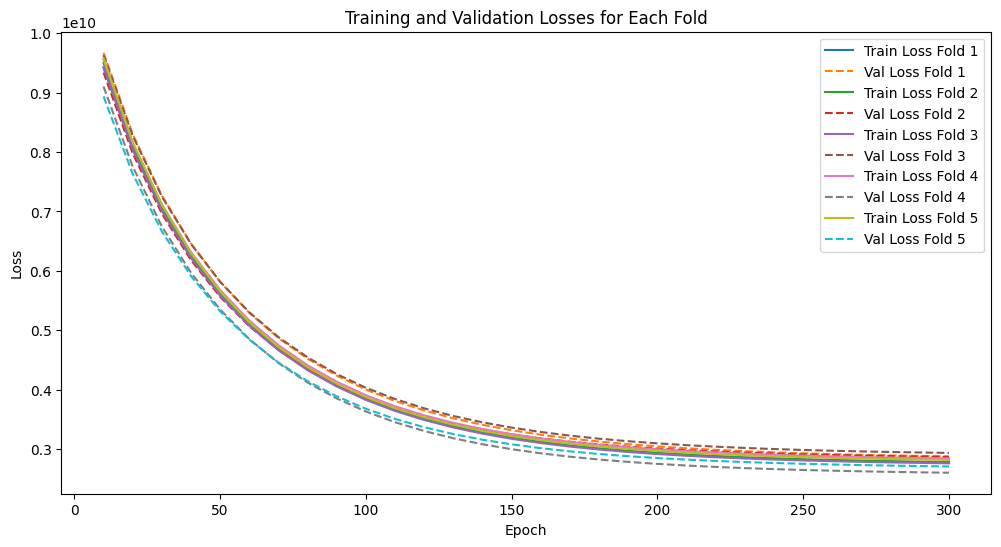

In [ ]:
plt.figure(figsize=(12, 6))

for i in range(k_folds):
    plt.plot(range(10, epochs + 1, 10), fold_train_losses[i], label=f'Train Loss Fold {i+1}')
    plt.plot(range(10, epochs + 1, 10), fold_val_losses[i], label=f'Val Loss Fold {i+1}', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Each Fold')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

metrics_dict = {"Fold": [],
                "Train_MAE": [], "Train_MSE": [], "Train_R2": [],
                "Val_MAE": [], "Val_MSE": [], "Val_R2": []}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full_df)):

  X_train_df, X_val_df = X_train_full_df.iloc[train_idx], X_train_full_df.iloc[val_idx]
  y_train_df, y_val_df = y_train_full_df.iloc[train_idx], y_train_full_df.iloc[val_idx]

  with torch.inference_mode():
    train_transformed = transformer.fit_transform(X_train_df).squeeze()
    train_preds = wealth_model_1(torch.tensor(train_transformed, dtype=torch.float32))

    val_transformed = transformer.transform(X_val_df).squeeze()
    val_preds = wealth_model_1(torch.tensor(val_transformed, dtype=torch.float32))

  metrics_dict["Fold"].append(fold+1)
  metrics_dict["Train_MAE"].append(mean_absolute_error(y_train_df.values, train_preds))
  metrics_dict["Train_MSE"].append(mean_squared_error(y_train_df.values, train_preds))
  metrics_dict["Train_R2"].append(r2_score(y_train_df.values, train_preds))

  metrics_dict["Val_MAE"].append(mean_absolute_error(y_val_df.values, val_preds))
  metrics_dict["Val_MSE"].append(mean_squared_error(y_val_df.values, val_preds))
  metrics_dict["Val_R2"].append(r2_score(y_val_df.values, val_preds))

pd.DataFrame(metrics_dict)

,Fold,Train_MAE,Train_MSE,Train_R2,Val_MAE,Val_MSE,Val_R2
0,1,38183.486259,2.775211e+09,0.748617,38644.279761,2.872672e+09,0.748825
1,2,38141.200602,2.778420e+09,0.749803,38852.245525,2.860296e+09,0.744074
2,3,37987.877609,2.760261e+09,0.750392,39415.202393,2.932193e+09,0.741843
3,4,38620.535022,2.843128e+09,0.745525,36894.109728,2.601112e+09,0.761543
4,5,38458.288563,2.816969e+09,0.748992,37587.037329,2.707803e+09,0.747065


In [ ]:
with torch.inference_mode():
    test_preds = wealth_model_1(torch.tensor(transformed_x0, dtype=torch.float32))

test_preds

tensor([-85880.9688])

# **9. Overfitting and Underfitting**

- Let us fit a new model with two-linear layers.

In [ ]:
import torch.nn as nn

class RegressionModel_2(nn.Module):
  def __init__(self, num_inputs, hidden_inputs, num_outputs=1):
    super().__init__()
    self.linear_layer1 = nn.Linear(in_features=num_inputs, out_features=hidden_inputs)
    self.linear_layer2 = nn.Linear(in_features=hidden_inputs, out_features=num_outputs)

  def forward(self, x):
    return self.linear_layer2(self.linear_layer1(x))

In [ ]:
torch.manual_seed(42)

num_obs, num_inputs = X_train.shape
wealth_model_2 = RegressionModel_2(num_inputs, 8)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=wealth_model_2.parameters(),  lr = 0.01)

epochs = 100
epoch_count = []

train_losses = []
val_losses = []

for epoch in range(1, epochs + 1):
  train_loss = train_model(
      wealth_model_2, X_train, y_train, criterion, optimizer)
  val_loss = eval_model(wealth_model_2, X_val, y_val)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch: {epoch}, Train Loss: {train_loss}, Val Loss: {val_loss}")

Epoch: 10, Train Loss: nan, Val Loss: nan
Epoch: 20, Train Loss: nan, Val Loss: nan
Epoch: 30, Train Loss: nan, Val Loss: nan
Epoch: 40, Train Loss: nan, Val Loss: nan
Epoch: 50, Train Loss: nan, Val Loss: nan
Epoch: 60, Train Loss: nan, Val Loss: nan
Epoch: 70, Train Loss: nan, Val Loss: nan
Epoch: 80, Train Loss: nan, Val Loss: nan
Epoch: 90, Train Loss: nan, Val Loss: nan
Epoch: 100, Train Loss: nan, Val Loss: nan


In [ ]:
torchinfo.summary(wealth_model_2, input_size= [num_inputs])

Layer (type:depth-idx)                   Output Shape              Param #
RegressionModel_2                        [1]                       --
├─Linear: 1-1                            [8]                       96
├─Linear: 1-2                            [1]                       9
Total params: 105
Trainable params: 105
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

- To solve the above infinite loss problem, I normalized the outputs by its maximum value

In [ ]:
torch.manual_seed(42)

num_obs, num_inputs = X_train.shape
wealth_model_2 = RegressionModel_2(num_inputs, 8)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params = wealth_model_2.parameters(),  lr = 0.01)

epochs = 100
epoch_count = []

train_losses = []
val_losses = []

for epoch in range(1, epochs + 1):
  y_train_normalized = y_train / max(y_train)
  train_loss = train_model(wealth_model_2, X_train,
                           y_train_normalized, criterion, optimizer)
  val_loss = eval_model(wealth_model_2, X_val, y_val)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch: {epoch}, Train Loss: {train_loss}, Val Loss: {val_loss}")

Epoch: 10, Train Loss: 0.1932346373796463, Val Loss: 10794395648.0
Epoch: 20, Train Loss: 0.17490628361701965, Val Loss: 10794392576.0
Epoch: 30, Train Loss: 0.16027481853961945, Val Loss: 10794389504.0
Epoch: 40, Train Loss: 0.14804194867610931, Val Loss: 10794385408.0
Epoch: 50, Train Loss: 0.13751591742038727, Val Loss: 10794383360.0
Epoch: 60, Train Loss: 0.1282808929681778, Val Loss: 10794380288.0
Epoch: 70, Train Loss: 0.12006276100873947, Val Loss: 10794379264.0
Epoch: 80, Train Loss: 0.11266867071390152, Val Loss: 10794376192.0
Epoch: 90, Train Loss: 0.10595738142728806, Val Loss: 10794375168.0
Epoch: 100, Train Loss: 0.09982257336378098, Val Loss: 10794373120.0


- What kind of problem do we encounter?
  - The training loss is decreasing steadily, indicating that the model is learning the training data well.
  - The validation loss remains extremely high and does not decrease, indicating that the model is not generalizing well to unseen data.
  - The model might be too complex (e.g., too many layers or parameters) for the amount of training data,
      -leading it to memorize the training data instead of learning general patterns.


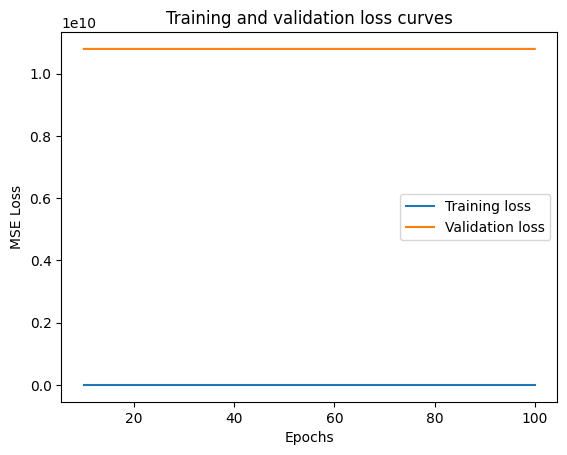

In [ ]:
plt.plot(epoch_count, train_losses, label="Training loss")
plt.plot(epoch_count, val_losses, label="Validation loss")
plt.title("Training and validation loss curves")
plt.ylabel("MSE Loss")
plt.xlabel("Epochs")
plt.legend();

**Dealing With Underfitting**

- A common technique of preventing overfitting is known as [**regularization**](https://ml-cheatsheet.readthedocs.io/en/latest/regularization.html).


| **Solution Method** | **What is it?** |
| ----- | ----- |
| **Get more data** | The model more opportunities to learn patterns, patterns which may be more generalizable to new examples. |
| **Simplify model** | Reduce the number of layers or to reduce the number of hidden units in each layer. |
| **[Augment data](https://developers.google.com/machine-learning/glossary#data-augmentation)** | It adds more variety to the data, the model may be able to generalize better to unseen data. |
|[**Transfer learning**](https://developers.google.com/machine-learning/glossary#transfer-learning) |  Leveraging the patterns of a model (also called pretrained weights) as a foundation, and adjusting them. |
| [**Dropout layers**](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) | Randomly remove connections between hidden layers in neural networks,. |
| **[Learning rate decay](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)** | Slowly decrease the learning rate as a model trains, the closer to [**convergence**](https://developers.google.com/machine-learning/glossary#convergence), the smaller weight updates.  |
| [**Early stopping**](https://developers.google.com/machine-learning/glossary#early_stopping) |  Stops model training **before it begins to overfit**. |

**Dealing With Underfitting**

- When a model is [**underfitting**](https://developers.google.com/machine-learning/glossary#underfitting), it has **poor predictive power** on the training and test sets.
- In essence, an underfitting model will fail to reduce the loss values to a desired level.

| **Solutiuon Method** | **What is it?** |
| ----- | ----- |
| **Add more layers/units** | Model to have enough capability to learn the required patterns/weights of the data. |
| **Tweak learning rate** | Updating its weights too much may not make learning, lower learning rate and observe. |
| **Transfer learning** | Transfer learning is capable of preventing overfitting and underfitting. |
| **Train for longer** | Sometimes a model just needs more time to learn representations of data. |
| **Less regularization** | Holding back on regularization techniques can help the model fit the data better. |


**Balance Between Overfitting and Underfitting**

- Transfer learning is perhaps one of the most powerful techniques when it comes to dealing with both overfitting and underfitting on certain problems.
- Rather than handcraft different overfitting and underfitting techniques, transfer learning enables to take an already working model in a similar problem (say one from [paperswithcode.com/sota](https://paperswithcode.com/sota)).

In [ ]:
1+3

4